# Documentation for Using the Traffic Model

This guide provides instructions on using the traffic model within a Jupyter notebook. The model is designed to simulate traffic dynamics based on predefined rules. Below are the steps to import and utilize the toy model as an example, which follows the basic rules outlined in the project brief.

## Importing the Model

To use the traffic model, start by importing the required class. In this example, we'll use the toy model provided. Ensure the model file (model_toy.py) is in the correct directory (model_class) or update the import statement with the correct path.

In [1]:
from model_class.model_toy_MN import TrafficSimulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import random

In [2]:
def plot_road(roads, vmax = None, nt =None, L = None):
    roads_to_plot = np.array(roads).copy()
    empty_sites_ind = np.where(roads_to_plot == '-')
    roads_to_plot[empty_sites_ind] = -1
    roads_to_plot = roads_to_plot.astype(float)
    roads_to_plot[empty_sites_ind] = np.nan
    
    cmap = plt.get_cmap("jet_r", vmax+1)
    norm = mpl.colors.BoundaryNorm(np.arange(-0.5, vmax+1), cmap.N)
    img = plt.imshow(roads_to_plot, cmap=cmap, aspect=1, norm = norm)
    plt.yticks(fontsize = 28)
    plt.xticks(fontsize = 28)
    plt.ylabel(ylabel= "Time", fontsize = 28)
    plt.xlabel(f"Road ($\\longrightarrow$)", fontsize = 32)
    
    plt.style.use("default") # find more styles here: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
    
    cb = plt.colorbar(orientation = "horizontal",  ticks=np.linspace(0,vmax, vmax+1))
    cb.ax.tick_params(labelsize=28)
    cb.set_label(label = f"Velocity", size = 28)
    plt.minorticks_on()
    # rows, cols = roads_to_plot.shape
    # for y in range(rows):
    #     for x in range(cols):
    #         val = roads_to_plot[y,x]
    #         if not np.isnan(val):
    #             val = int(val)
    #             plt.text(x, y, val, fontsize = 12, 
    #                     horizontalalignment = "center", 
    #                     verticalalignment = "center")

    return img

## Initializing the Model

After importing the class, initialize an instance of the TrafficSimulation class with the desired parameters, such as road_length, density, and car_slow_down_prob.

Execute the simulation using a loop to update the model over a specified number of time steps. In this example, we run the simulation for 10 time steps:

In [3]:
# Your simulation parameters
road_length = 30
density = 0.22
car_slow_down_prob = 0.1
number_of_simulation_steps = 9
road_speed_limit = 10

# Create an instance of TrafficSimulation
sim1 = TrafficSimulation(road_length, density, car_slow_down_prob, road_speed_limit)

# Run the simulation
for _ in range(number_of_simulation_steps):
    # sim1.print_step()   # Here we print the state of the model, we can remove. 
    sim1.update()        # Steps the simulation 
    print(sim1.get_heatmap())

[9, '-', '-', '-', '-', 4, 0, '-', '-', '-', '-', '-', '-', 6, '-', '-', '-', 3, '-', '-', 2, '-', '-', '-', '-', '-', '-', '-', '-', '-']
['-', '-', '-', '-', 4, 0, '-', 1, '-', '-', '-', '-', '-', '-', '-', '-', 3, '-', '-', 2, '-', '-', 2, '-', '-', '-', '-', '-', '-', '-']
['-', '-', '-', '-', 0, 0, '-', '-', 1, '-', '-', '-', '-', '-', '-', '-', '-', 1, '-', '-', '-', 2, '-', '-', '-', 3, '-', '-', '-', '-']
['-', '-', '-', '-', 0, '-', 1, '-', '-', '-', 2, '-', '-', '-', '-', '-', '-', '-', '-', 2, '-', '-', '-', '-', 3, '-', '-', '-', '-', 4]
['-', '-', 3, '-', '-', 1, '-', '-', 2, '-', '-', '-', '-', 3, '-', '-', '-', '-', '-', '-', '-', '-', 3, '-', '-', '-', '-', '-', 4, '-']
['-', 3, '-', '-', 2, '-', '-', 2, '-', '-', '-', 3, '-', '-', '-', '-', '-', 4, '-', '-', '-', '-', '-', '-', '-', '-', 4, '-', '-', '-']
[4, '-', '-', 2, '-', '-', 2, '-', '-', 2, '-', '-', '-', '-', '-', 4, '-', '-', '-', '-', '-', '-', 5, '-', '-', '-', '-', '-', '-', '-']
['-', '-', 2, '-', '-', 2, 

# Accessing Simulation Results

To retrieve information from the simulation, you can access data such as the number of laps completed and a histogram of the number of cars at  different speeds. Additionally, you can print this information using the following code:

In [4]:
# Print simulation results
print(f'Number of cars seen at the boundary (over the whole simulation): {sim1.data_laps}')
print(f'Flow rate: {sim1.data_laps / number_of_simulation_steps} cars per iteration')
print(f'Dictionary of the number of cars at a speed:\n{sim1.data_speeds_histogram}')

Number of cars seen at the boundary (over the whole simulation): 5
Flow rate: 0.5555555555555556 cars per iteration
Dictionary of the number of cars at a speed:
{2: 1, 1: 1, 3: 2, 4: 1, 6: 1}


Note, that we can run data_speeds_histogram at each step, as the data changes per each time step, as an example:

In [5]:
# Run the simulation and print speed histograms at each step

dicts = []

for step in range(number_of_simulation_steps):
    sim1.print_step()  # Print the current state of the simulation
    sim1.update()      # Update the simulation for the next time step
    dicts.append(sim1.data_speeds_histogram)
    
    # Print speed histogram at each step
    print(f'Step {step + 1} - Dictionary of the number of cars at a speed:\n{sim1.data_speeds_histogram}')

- 3 - - 2 - 1 - - - - 3 - - - - 4 - - - - - - - - - 6 - - -
Step 1 - Dictionary of the number of cars at a speed:
{2: 2, 1: 1, 4: 2, 5: 1}
4 - - 2 - 1 - - 2 - - - - - - 4 - - - - - 5 - - - - - - - -
Step 2 - Dictionary of the number of cars at a speed:
{2: 2, 1: 1, 3: 1, 5: 1, 6: 1}
- - 2 - 1 - - 2 - - - 3 - - - - - - - - 5 - - - - - - 6 - -
Step 3 - Dictionary of the number of cars at a speed:
{1: 1, 2: 2, 4: 2, 6: 1}
- 4 - 1 - - 2 - - 2 - - - - - 4 - - - - - - - - - - 6 - - -
Step 4 - Dictionary of the number of cars at a speed:
{1: 2, 2: 1, 3: 1, 5: 1, 4: 1}
4 - 1 - 1 - - - 2 - - - 3 - - - - - - - 5 - - - - - - - - -
Step 5 - Dictionary of the number of cars at a speed:
{1: 2, 2: 1, 3: 1, 4: 1, 6: 1}
- 1 - 1 - - 2 - - - - 3 - - - - 4 - - - - - - - - - 6 - - -
Step 6 - Dictionary of the number of cars at a speed:
{1: 1, 2: 2, 4: 2, 5: 1}
4 - 1 - - 2 - - 2 - - - - - - 4 - - - - - 5 - - - - - - - -
Step 7 - Dictionary of the number of cars at a speed:
{1: 1, 2: 2, 3: 1, 5: 1, 6: 1}
- 1

In [6]:
dicts_df = pd.DataFrame.from_dict(dicts)
dicts_df.index.names = ['Iteration']
dicts_df = dicts_df.reindex(sorted(dicts_df.columns), axis=1)
dicts_df = dicts_df.fillna(0)
dicts_df = dicts_df.transpose()
dicts_df.index.names = ["Speed"]
dicts_df = dicts_df.astype(int)
dicts_df.columns = dicts_df.columns.astype(str)


# g = sns.FacetGrid(tips, col="time",  row="sex")
# g.map(sns.scatterplot, "total_bill", "tip")
display(dicts_df)
# fig, ax = plt.subplots(len(dicts_df.columns),1, figsize = (3, 27))
# dicts_df.plot.bar(subplots=True, figsize = (3, 27))        

Iteration,0,1,2,3,4,5,6,7,8
Speed,,,,,,,,,
1,1,1,1,2,2,1,1,0,0
2,2,2,2,1,1,2,2,2,2
3,0,1,0,1,1,0,1,2,3
4,2,0,2,1,1,2,0,1,0
5,1,1,0,1,0,1,1,0,1
6,0,1,1,0,1,0,1,1,0


This modification to the code prints the speed histogram at each time step, allowing you to observe the evolving distribution of car speeds throughout the simulation. Adjust the number_of_simulation_steps variable based on the actual number of steps used in your simulation. Feel free to further customize the output or include additional information as needed for your analysis.

I have built some test functions for the rule sets which can be called as: Note they will over ride some parameters are required.

In [7]:
road_length = 30
density = 0.22
car_slow_down_prob = 0.1
number_of_simulation_steps=10
sim1.test_simple_acceleration(0)    # set the model for the test, with the variable being pass is the car_slow_down_prob
# road_outputs = []
# Run the simulation
for _ in range(number_of_simulation_steps):
    sim1.print_step()    # Here we print the state of the model, we can remove. 
    sim1.update()        # Steps the simulation 
    # road_outputs.append(sim1.get_heatmap())

0 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
- 1 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
- - - 2 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
- - - - - - 3 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
- - - - - - - - - - 4 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
- - - - - - - - - - - - - - - 5 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
- - - - - - - - - - - - - - - - - - - - 5 - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
- - - - - - - - - - - - - - - - - - - - - - - - - 5 - - - - - - - - - - - - - - - - - - - - - - - -
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 5 - - - - - - - - - - - - - - - - - - -
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 5 - - - - - - - - - - - - - -


In [8]:
sim1.test_simple_acceleration(0.5)    # set the model for the test, with the variable being pass is the starting speed.
# Run the simulation
for _ in range(number_of_simulation_steps):
    sim1.print_step()    # Here we print the state of the model, we can remove. 
    sim1.update()        # Steps the simulation 

0 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
- 1 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
- - 1 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
- - - - 2 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
- - - - - - - 3 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
- - - - - - - - - - 3 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
- - - - - - - - - - - - - 3 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
- - - - - - - - - - - - - - - - - 4 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
- - - - - - - - - - - - - - - - - - - - - - 5 - - - - - - - - - - - - - - - - - - - - - - - - - - -
- - - - - - - - - - - - - - - - - - - - - - - - - - 4 - - - - - - - - - - - - - - - - - - - - - - -


In [9]:
sim1.test_simple_deceleration(0)  # Variable is the starting speed
for _ in range(number_of_simulation_steps):
    sim1.print_step()    # Here we print the state of the model, we can remove. 
    sim1.update()        # Steps the simulation 

0 - - - 0 - - - - -
- 1 - - 0 - - - - -
- - - 2 0 - - - - -
- - - 0 0 - - - - -
- - - 0 0 - - - - -
- - - 0 0 - - - - -
- - - 0 0 - - - - -
- - - 0 0 - - - - -
- - - 0 0 - - - - -
- - - 0 0 - - - - -


In [10]:
sim1.test_simple_deceleration(3)  # Variable is the starting speed
for _ in range(number_of_simulation_steps):
    sim1.print_step()    # Here we print the state of the model, we can remove. 
    sim1.update()        # Steps the simulation 

3 - - - 0 - - - - -
- - - 3 0 - - - - -
- - - 0 0 - - - - -
- - - 0 0 - - - - -
- - - 0 0 - - - - -
- - - 0 0 - - - - -
- - - 0 0 - - - - -
- - - 0 0 - - - - -
- - - 0 0 - - - - -
- - - 0 0 - - - - -


In [11]:
# we can also change the  stationary car position with the second argument
sim1.test_simple_deceleration(0, 8)  # Variable is the starting speed, stationary car position
for _ in range(number_of_simulation_steps):
    sim1.print_step()    # Here we print the state of the model, we can remove. 
    sim1.update()        # Steps the simulation 

0 - - - - - - - 0 -
- 1 - - - - - - 0 -
- - - 2 - - - - 0 -
- - - - - - 3 - 0 -
- - - - - - - 1 0 -
- - - - - - - 0 0 -
- - - - - - - 0 0 -
- - - - - - - 0 0 -
- - - - - - - 0 0 -
- - - - - - - 0 0 -


#  Variable speed testing 
For this we need to import the updated model as before we import it:

In [15]:
from model_class.model_variable_speed_limits_MN import TrafficSimulation as VariableSpeedTrafficSimulation

In [13]:
road_speed_limit_list = ([18]*100) + ([9]*40 ) # You can create a list like this [speed_limit of road] * (how many blocks)
density = 15/len(road_speed_limit_list)
car_slow_down_prob = .1
# road_length = 70
number_of_simulation_steps = 100
sim2 = VariableSpeedTrafficSimulation(road_speed_limit_list, density, car_slow_down_prob)

# sim2.test_variable_speed_limits(6,4)
sim2.print_speed_limits()
var_sl_road_outputs = []
# limit_list = sim2.get_road_header()
for _ in range(number_of_simulation_steps):
    # sim2.print_step()
    sim2.update()
    var_sl_road_outputs.append(sim2.get_heatmap())

18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9


Number of cars seen at the boundary (over the whole simulation): 75
Flow rate: 0.75 cars per iteration
18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9


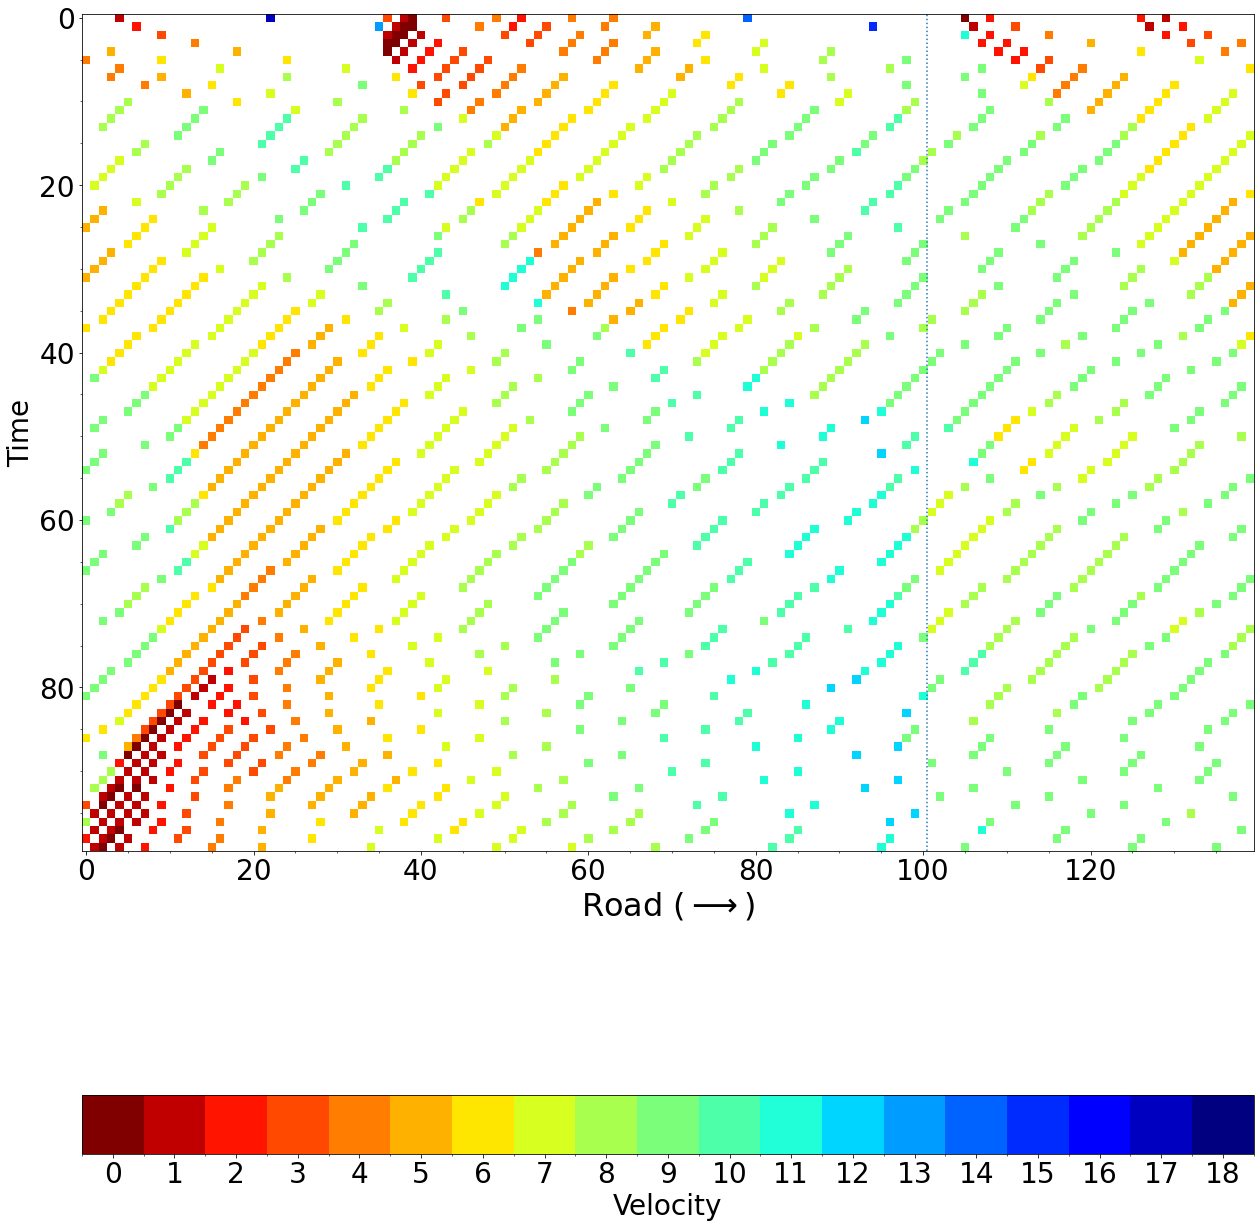

In [14]:
fig, ax = plt.subplots(figsize = (21,30))

plt.axvline(100.5, linestyle = "dotted")
plot_road(var_sl_road_outputs, vmax = max(road_speed_limit_list), nt = number_of_simulation_steps, L = len(road_speed_limit_list))

print(f'Number of cars seen at the boundary (over the whole simulation): {sim2.data_laps}')
print(f'Flow rate: {sim2.data_laps / number_of_simulation_steps} cars per iteration')
sim2.print_speed_limits()

Number of cars seen at the boundary (over the whole simulation): 25
Flow rate: 0.625 cars per iteration


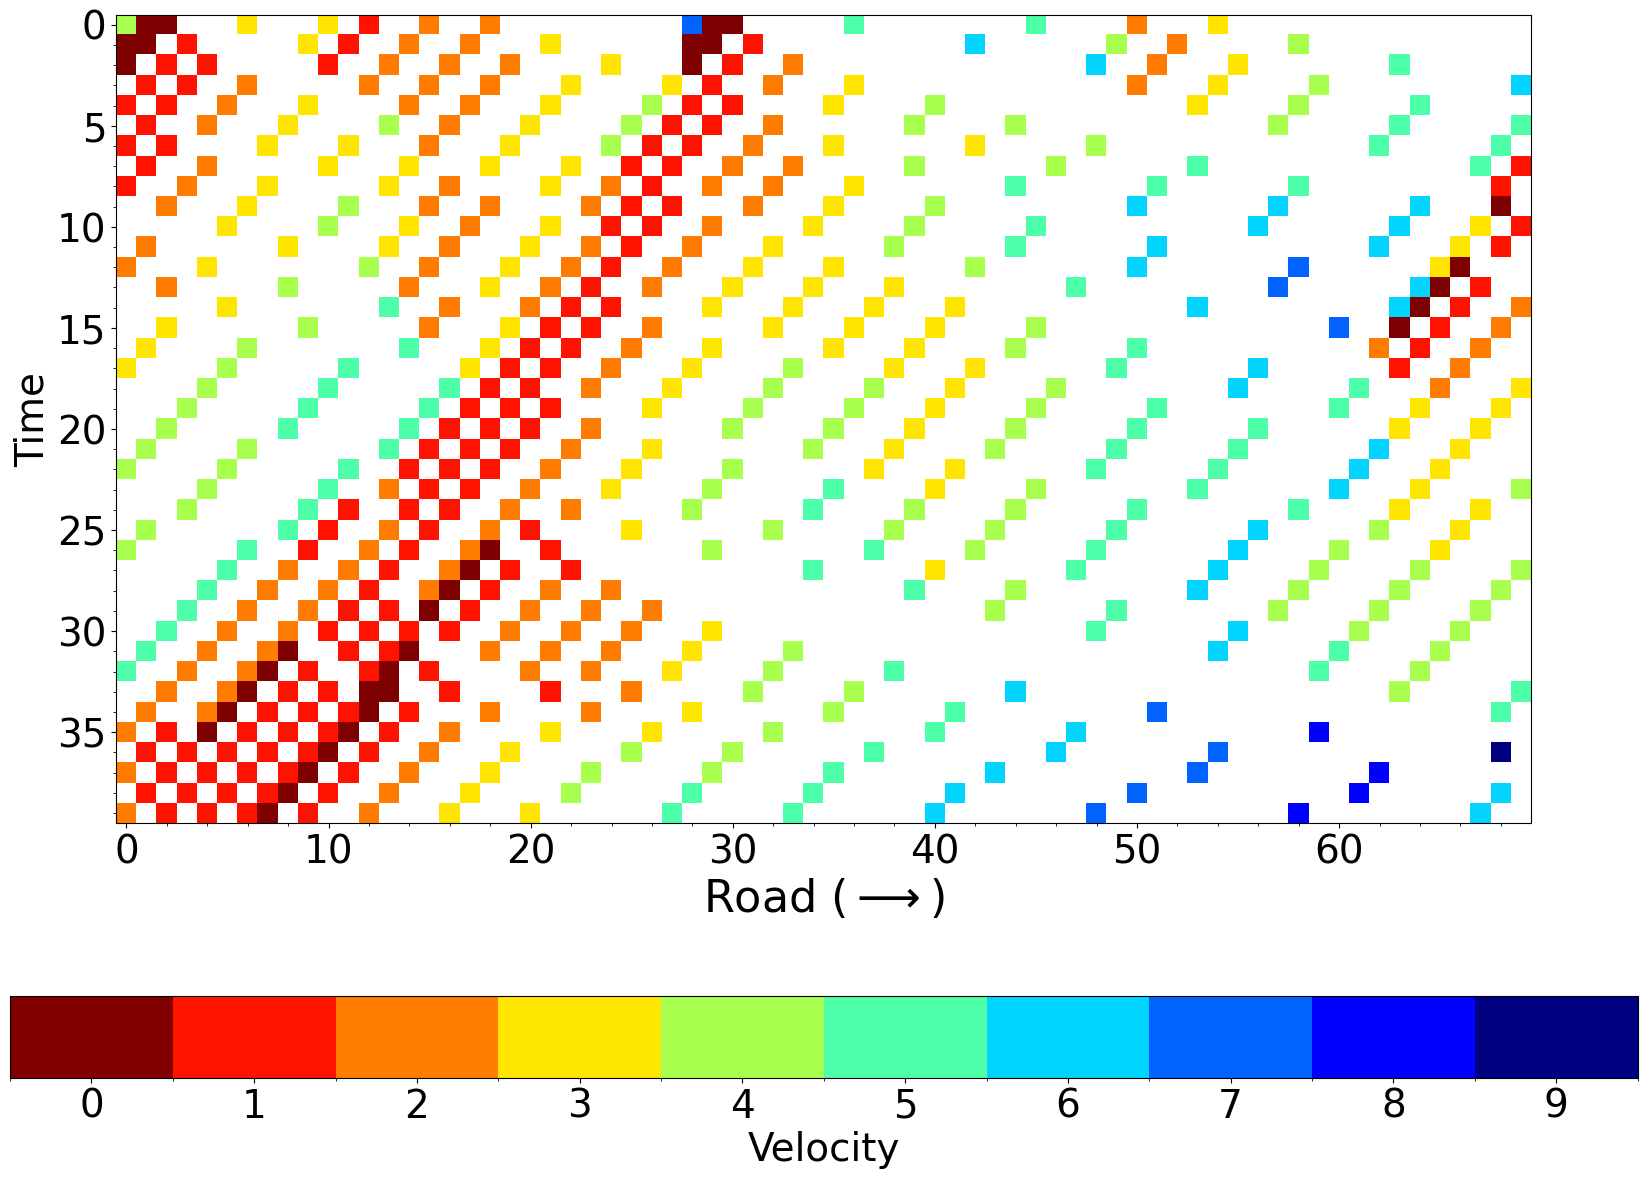

In [15]:
road_length = 70
density = 15/road_length
car_slow_down_prob = 0.1
number_of_simulation_steps= 40
road_speed_limit = 9

sim1 = TrafficSimulation(road_length, density, car_slow_down_prob, road_speed_limit)

road_outputs = []
# Run the simulation
for _ in range(number_of_simulation_steps):
    # sim1.print_step()    # Here we print the state of the model, we can remove. 
    sim1.update()        # Steps the simulation 
    road_outputs.append(sim1.get_heatmap())

fig, ax = plt.subplots(figsize = (21,15))

plot_road(road_outputs, vmax = road_speed_limit, nt = number_of_simulation_steps, L = road_length)

print(f'Number of cars seen at the boundary (over the whole simulation): {sim1.data_laps}')
print(f'Flow rate: {sim1.data_laps / number_of_simulation_steps} cars per iteration')

# Model Validation

In [32]:
road_lengths = [14, 35, 70, 140]
densities = np.linspace(0, 1, 100)

# road_length = 70
# density = 15/road_length
car_slow_down_prob = 0.1
number_of_simulation_steps= 1000
road_speed_limit = 9

flow_rates_road_lengths = []
for road_length in road_lengths:
    flow_rates = []
    for density in densities:
        sim1 = TrafficSimulation(road_length, density, car_slow_down_prob, road_speed_limit)
        # Run the simulation
        for _ in range(number_of_simulation_steps):
            # sim1.print_step()    # Here we print the state of the model, we can remove. 
            sim1.update()        # Steps the simulation
        flow_rate = sim1.data_laps/number_of_simulation_steps
        flow_rates.append(flow_rate)
    flow_rates_road_lengths.append(flow_rates)

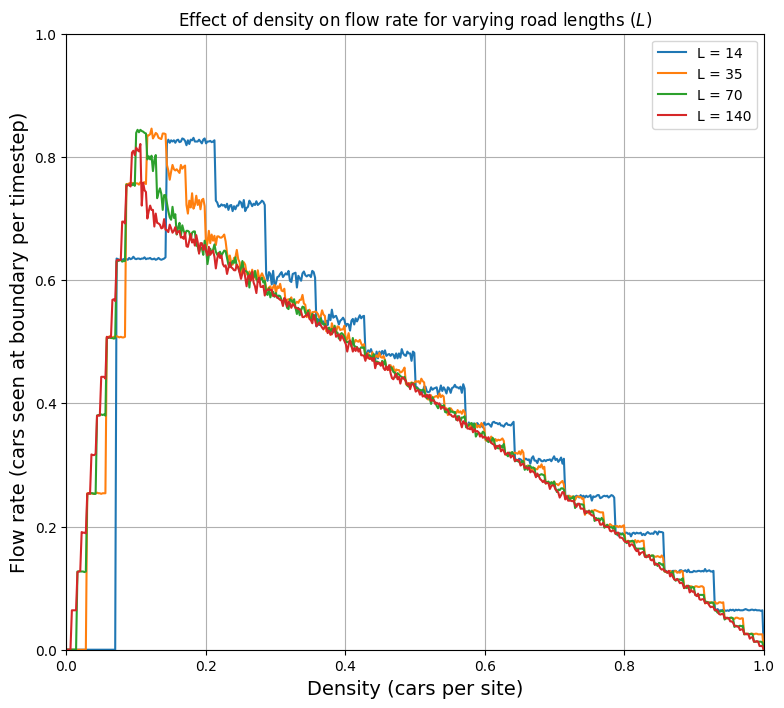

In [17]:
fig, ax = plt.subplots(figsize = (9,8))
for i in range(len(road_lengths)):
    plt.plot(densities, flow_rates_road_lengths[i], label = f"L = {road_lengths[i]}")
plt.legend()
plt.title(f"Effect of density on flow rate for varying road lengths ($L$)")
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel("Density (cars per site)", fontsize = 14)
plt.ylabel("Flow rate (cars seen at boundary per timestep)", fontsize = 14)
plt.grid()

In [29]:
nts = [10, 50, 75, 100, 1000, 10000]
# nts = [50, 100]
densities = np.linspace(0, 1, 100)

road_length = 70
# density = 15/road_length
car_slow_down_prob = 0.1
# number_of_simulation_steps= 10000
road_speed_limit = 9

flow_rates_timesteps = []
for number_of_simulation_steps in nts:
    flow_rates = []
    for density in densities:
        sim1 = TrafficSimulation(road_length, density, car_slow_down_prob, road_speed_limit)
        # Run the simulation
        for _ in range(number_of_simulation_steps):
            # sim1.print_step()    # Here we print the state of the model, we can remove. 
            sim1.update()        # Steps the simulation
        flow_rate = sim1.data_laps/number_of_simulation_steps
        flow_rates.append(flow_rate)
    flow_rates_timesteps.append(flow_rates)

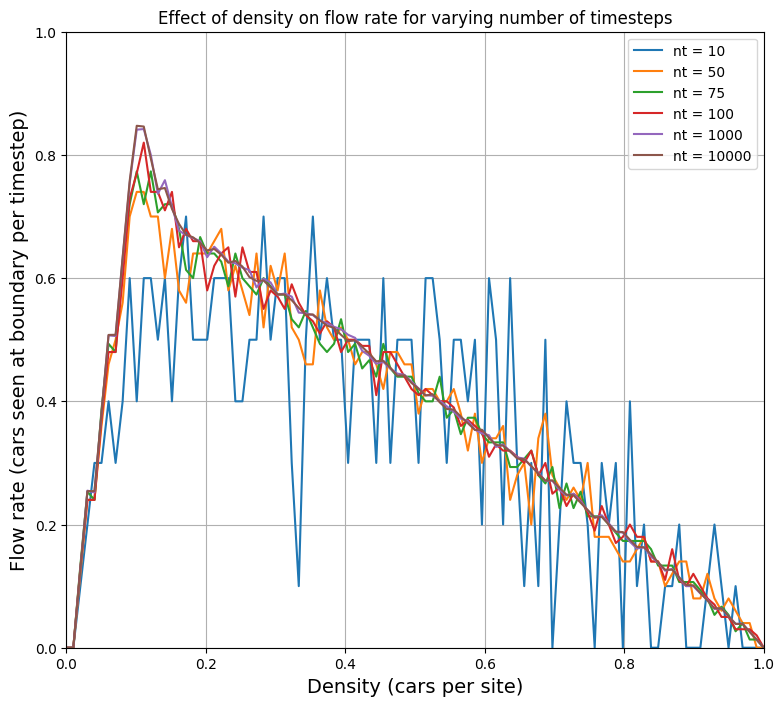

In [19]:
fig, ax = plt.subplots(figsize = (9,8))
for i in range(len(nts)):
    plt.plot(densities, flow_rates_timesteps[i], label = f"nt = {nts[i]}")
plt.legend()
plt.title(f"Effect of density on flow rate for varying number of timesteps")
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel("Density (cars per site)", fontsize = 14)
plt.ylabel("Flow rate (cars seen at boundary per timestep)", fontsize = 14)
plt.grid()

In [20]:
# print(f'Number of cars seen at the boundary (over the whole simulation): {sim1.data_laps}')
# print(f'Flow rate: {sim1.data_laps / number_of_simulation_steps} cars per iteration')

In [44]:
speed_limits = [9, 18, 27]
densities = np.linspace(0, 1, 100)

road_length = 70
# density = 15/road_length
car_slow_down_prob = 0.1
number_of_simulation_steps= 1000
# road_speed_limit = 9

flow_rates_speeds = []
for road_speed_limits in speed_limits:
    flow_rates = []
    for density in densities:
        sim1 = TrafficSimulation(road_length, density, car_slow_down_prob, road_speed_limit)
        # Run the simulation
        for _ in range(number_of_simulation_steps):
            # sim1.print_step()    # Here we print the state of the model, we can remove. 
            sim1.update()        # Steps the simulation
        flow_rate = sim1.data_laps/number_of_simulation_steps
        flow_rates.append(flow_rate)
    flow_rates_speeds.append(flow_rates)

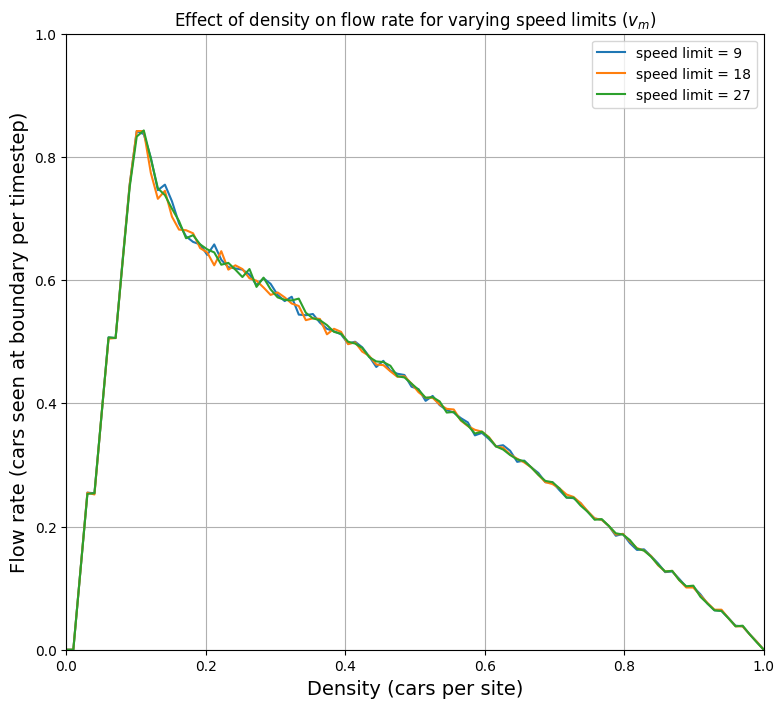

In [22]:
fig, ax = plt.subplots(figsize = (9,8))
for i in range(len(speed_limits)):
    plt.plot(densities, flow_rates_speeds[i], label = f"speed limit = {speed_limits[i]}")
plt.legend()
plt.title(fr"Effect of density on flow rate for varying speed limits ($v_m$)")
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel("Density (cars per site)", fontsize = 14)
plt.ylabel("Flow rate (cars seen at boundary per timestep)", fontsize = 14)
plt.grid()

In [40]:
probabilities = [0, 0.2, 0.4, 0.6, 0.8]
densities = np.linspace(0, 1, 100)

road_length = 70
# density = 15/road_length
# car_slow_down_prob = 0.1
number_of_simulation_steps= 1000
road_speed_limit = 9

flow_rates_probs = []
for prob in probabilities:
    flow_rates = []
    for density in densities:
        sim1 = TrafficSimulation(road_length, density, prob, road_speed_limit)
        # Run the simulation
        for _ in range(number_of_simulation_steps):
            # sim1.print_step()    # Here we print the state of the model, we can remove. 
            sim1.update()        # Steps the simulation
        flow_rate = sim1.data_laps/number_of_simulation_steps
        flow_rates.append(flow_rate)
    flow_rates_probs.append(flow_rates)

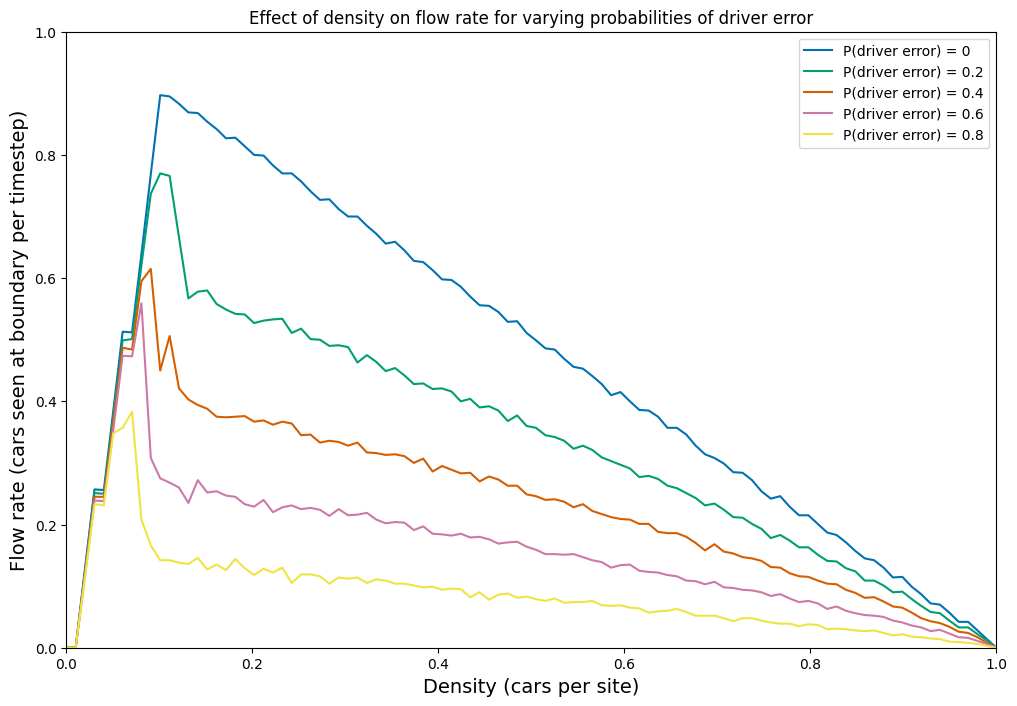

In [74]:
fig, ax = plt.subplots(figsize = (12,8))
plt.style.use("seaborn-v0_8-colorblind")
for i in range(len(probabilities)):
    plt.plot(densities, flow_rates_probs[i], label = f"P(driver error) = {probabilities[i]}")
plt.legend()
plt.title(f"Effect of density on flow rate for varying probabilities of driver error")
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel("Density (cars per site)", fontsize = 14)
plt.ylabel("Flow rate (cars seen at boundary per timestep)", fontsize = 14)
plt.show()

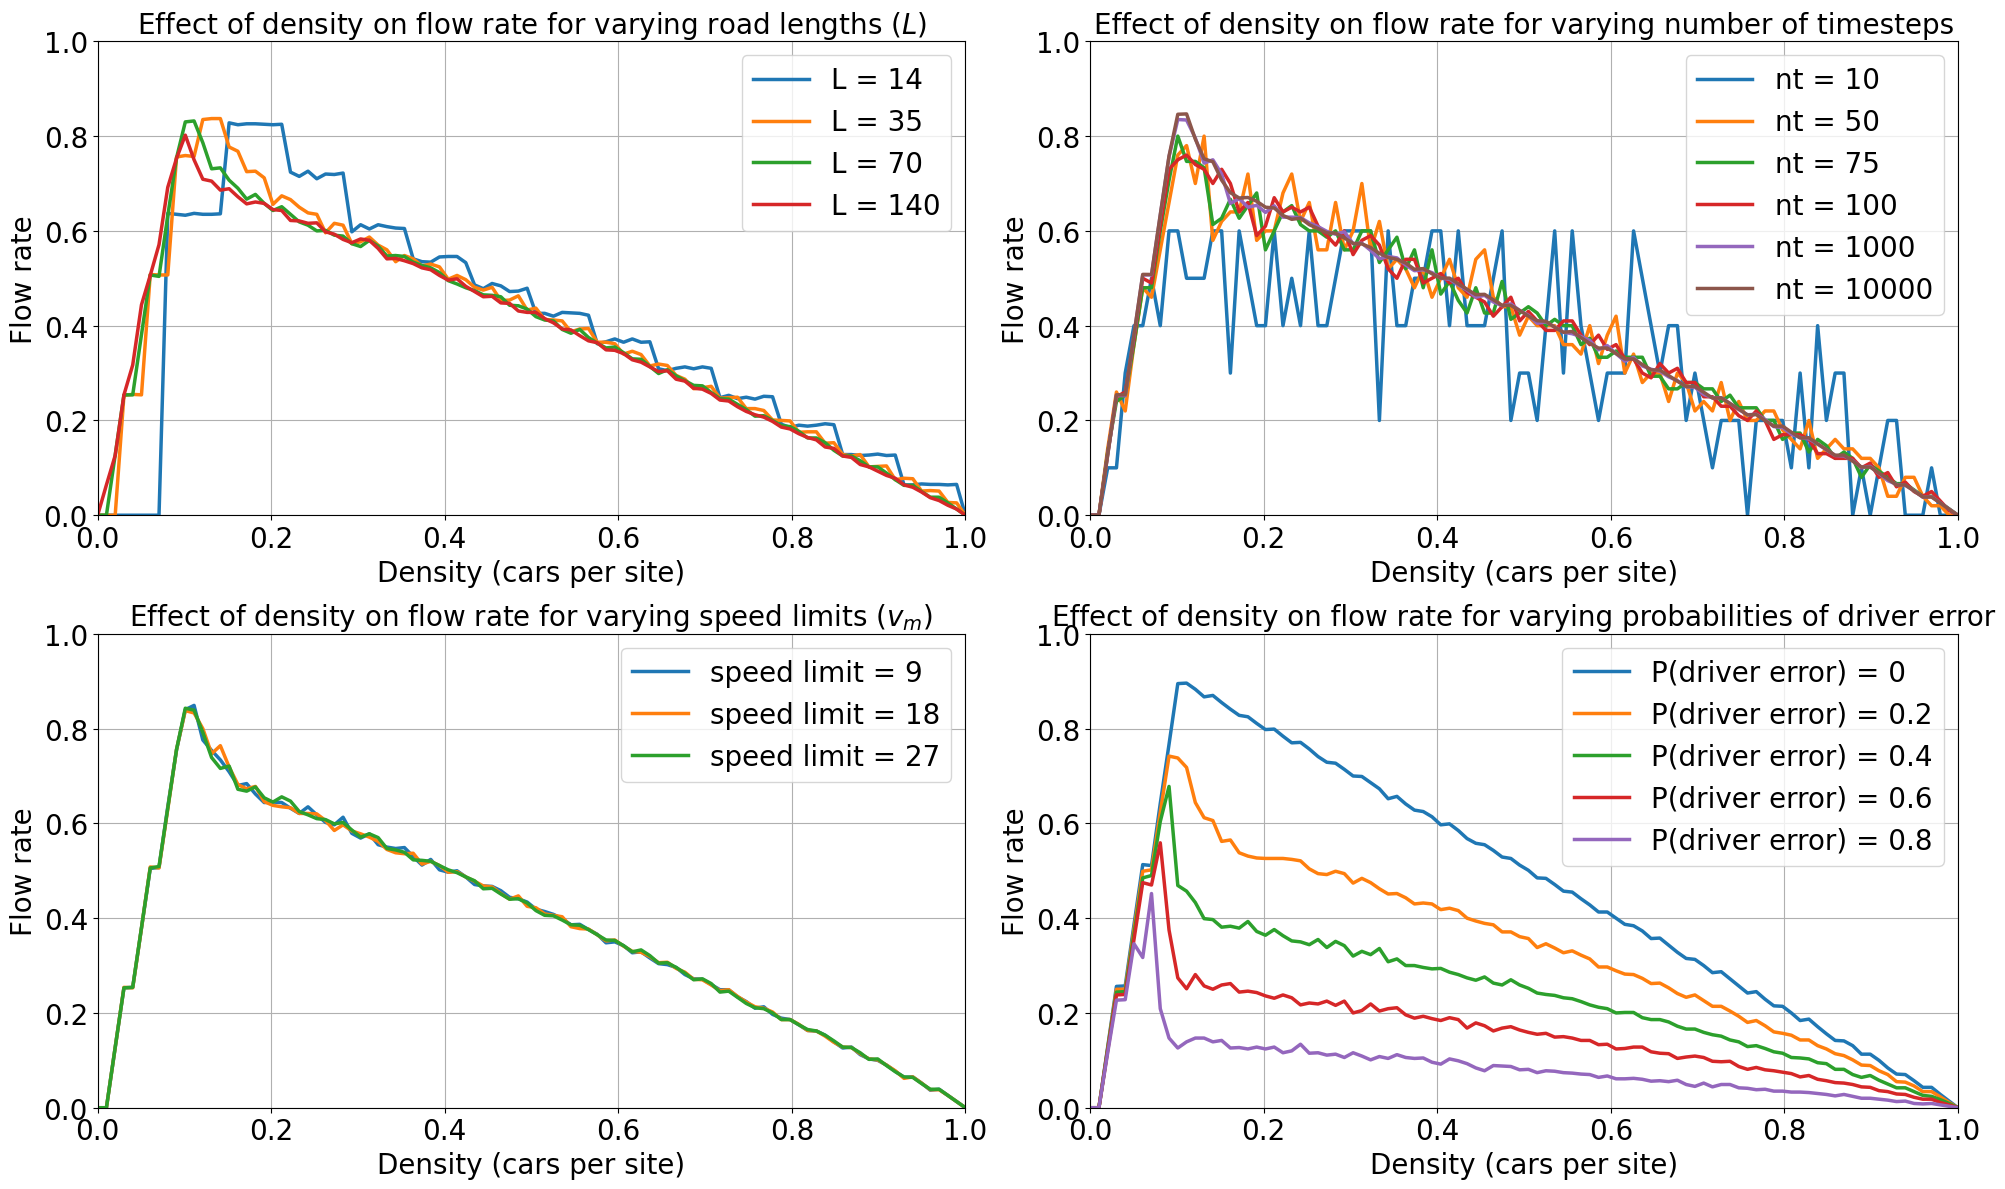

In [57]:
fig, ax = plt.subplots(2, 2, figsize = (20,12))

for i in range(len(road_lengths)):
    ax[0,0].plot(densities, flow_rates_road_lengths[i], label = f"L = {road_lengths[i]}", linewidth = 2.5)
ax[0,0].legend(fontsize = 20)
ax[0,0].set_title(f"Effect of density on flow rate for varying road lengths ($L$)", fontsize = 20)
ax[0,0].set_xlim([0,1])
ax[0,0].set_ylim([0,1])
ax[0,0].set_xlabel("Density (cars per site)", fontsize = 20)
ax[0,0].set_ylabel("Flow rate", fontsize = 20)
ax[0,0].tick_params(labelsize = 20)
ax[0,0].grid(True)


for i in range(len(nts)):
    ax[0,1].plot(densities, flow_rates_timesteps[i], label = f"nt = {nts[i]}", linewidth = 2.5)
ax[0,1].legend(fontsize = 20)
ax[0,1].set_title(f"Effect of density on flow rate for varying number of timesteps", fontsize = 20)
ax[0,1].set_xlim([0,1])
ax[0,1].set_ylim([0,1])
ax[0,1].set_xlabel("Density (cars per site)", fontsize = 20)
ax[0,1].set_ylabel("Flow rate", fontsize = 20)
ax[0,1].tick_params(labelsize = 20)
ax[0,1].grid(True)


for i in range(len(speed_limits)):
    ax[1,0].plot(densities, flow_rates_speeds[i], label = f"speed limit = {speed_limits[i]}", linewidth = 2.5)
ax[1,0].legend(fontsize = 20)
ax[1,0].set_title(f"Effect of density on flow rate for varying speed limits ($v_m$)", fontsize = 20)
ax[1,0].set_xlim([0,1])
ax[1,0].set_ylim([0,1])
ax[1,0].set_xlabel("Density (cars per site)", fontsize = 20)
ax[1,0].set_ylabel("Flow rate", fontsize = 20)
ax[1,0].tick_params(labelsize = 20)
ax[1,0].grid(True)

for i in range(len(probabilities)):
    ax[1,1].plot(densities, flow_rates_probs[i], label = f"P(driver error) = {probabilities[i]}", linewidth = 2.5)
ax[1,1].legend(fontsize = 20)
ax[1,1].set_title(f"Effect of density on flow rate for varying probabilities of driver error", fontsize = 20)
ax[1,1].set_xlim([0,1])
ax[1,1].set_ylim([0,1])
ax[1,1].set_xlabel("Density (cars per site)", fontsize = 20)
ax[1,1].set_ylabel("Flow rate", fontsize = 20)
ax[1,1].tick_params(labelsize = 20)
ax[1,1].grid(True)


plt.tight_layout()
plt.show()

# Traffic Light Simulations

In [2]:
from model_class.model_simply_traffic_lights_MN import TrafficSimulation as TrafficLightSimulation

In [4]:
random.seed(123)
limit_boundaries = [80]
region_lengths = [80, 200]
region_speed_limits = [18, 9]
light_positions = [120]
red_time = 6
nt = 100
car_slow_down_prob = 0.2
road_speed_limit_list = ([region_speed_limits[0]]*region_lengths[0]) + ([region_speed_limits[1]]*region_lengths[1]) # + ([18]*40) # You can create a list like this [speed_limit of road] * (how many blocks)
# density = 15/len(road_speed_limit_list)
n_cars = 20

# # this is (traffic light position, green time, red time, starting time): reduce diff between green and red time to increase red light signals
traffic_light_list = [(light_positions[0], red_time + 30, red_time, 0, False)] 


# sim3 = TrafficLightSimulation(road_speed_limit_list, traffic_light_list, density, car_slow_down_prob) 
# road_outputs = []
# traffic_light_outputs = []

# # sim3.print_speed_limits()
# for _ in range(nt):
#     # sim3.print_traffic_lights()
#     road_outputs.append(sim3.get_heatmap())
#     traffic_light_outputs.append(sim3.get_traffic_lights())
#     # sim3.print_step() 
#     sim3.update()

In [3]:
def simulate_traffic_lights(region_lengths, region_speed_limits, n_cars, nt, car_slow_down_prob, traffic_light_list):
    road_speed_limit_list = []
    for i in range(len(region_lengths)):
        road_speed_limit_list = road_speed_limit_list + [region_speed_limits[i]]*region_lengths[i]
    density = n_cars/len(road_speed_limit_list)
    
    sim3 = TrafficLightSimulation(road_speed_limit_list, traffic_light_list, density, car_slow_down_prob)
        
    road_outputs = []
    traffic_light_outputs = []
    road_outputs_vel_only = []
    speed_lims_per_cell = []
    SPI_per_iteration = []

    # sim3.print_speed_limits()
    for _ in range(nt):
        
        # code for obtaining speed diffs
        heatmap_vals = sim3.get_heatmap()
        road_outputs.append(heatmap_vals)
        cells_w_speeds = np.array([vel for vel in heatmap_vals if not isinstance(vel, str)])
        road_outputs_vel_only.append(cells_w_speeds)
        
        # code for obtaining SPI
        speed_lims = sim3.get_speed_limits()
        # print(speed_lims)
        SPI_iter = []
        for index, speed in enumerate(heatmap_vals):
            if not isinstance(speed, str):
                SPI_iter.append(speed / speed_lims[index])
        SPI_per_iteration.append(np.mean(SPI_iter))
        
        traffic_light_outputs.append(sim3.get_traffic_lights())
        sim3.update() 
        
     
    # average flow rate per iteration    
    flow_rate = sim3.data_laps/nt

    # average SPI per iteration
    SPI = np.sum(np.array(SPI_per_iteration))/nt
        
        
    
    # avg diff per iteration
    vel_range = 0
    for i in road_outputs_vel_only:
        vel_range += abs(np.max(i)-np.min(i))
    avg_vel_range = vel_range/nt
    
    
    return road_outputs, traffic_light_outputs, flow_rate, avg_vel_range, SPI

In [5]:
random.seed(123)
simulation1 = simulate_traffic_lights(region_lengths, region_speed_limits, 
                                      n_cars, nt, car_slow_down_prob, 
                                      traffic_light_list)

In [16]:
def plot_road_with_lights(roads, traffic_light_roads, light_positions, limit_boundaries, vmax = None, nt =None, L = None, traffic_light_list = None):
    roads_to_plot = np.array(roads).copy()
    empty_sites_ind = np.where(roads_to_plot == '-')
    roads_to_plot[empty_sites_ind] = 0
    roads_to_plot = roads_to_plot.astype(float)
    roads_to_plot[empty_sites_ind] = np.nan
    
    lights_to_plot = np.array(traffic_light_roads).copy()
    empty_sites_ind2 = np.where(lights_to_plot == '-')
    lights_to_plot[empty_sites_ind2] = 0
    empty_sites_ind_g = np.where(lights_to_plot == 'g')
    lights_to_plot[empty_sites_ind_g] = 0
    empty_sites_ind_r = np.where(lights_to_plot == 'r')
    lights_to_plot[empty_sites_ind_r] = 1
    lights_to_plot = lights_to_plot.astype(float)
    lights_to_plot[empty_sites_ind_g] = np.nan
    lights_to_plot[empty_sites_ind2] = np.nan
    
    # Traffic light plot
    cmap = plt.get_cmap("binary", 3)
    norm = mpl.colors.BoundaryNorm([-0.5,6.5], cmap.N)
    img = plt.imshow(lights_to_plot[:nt+1], cmap=cmap, norm=norm)
    
    # cb = plt.colorbar(orientation = "horizontal")
    # cb.ax.tick_params(labelsize=28)
    # cb.set_label(label = f"Velocity", size = 28)
    # plt.minorticks_on()
    
    # Vehicles plot
    cmap = plt.get_cmap("jet_r", vmax+1)
    norm = mpl.colors.BoundaryNorm(np.arange(-0.5, vmax+1), cmap.N)
    img2 = plt.imshow(roads_to_plot[:nt+1], cmap=cmap, aspect=1, norm = norm)
    plt.yticks(fontsize = 28)
    plt.xticks(fontsize = 28)
    plt.ylabel(ylabel= "Time", fontsize = 28)
    plt.xlabel(f"Road ($\\longrightarrow$)", fontsize = 32)
    
    plt.style.use("default") # find more styles here: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
    
    cb = plt.colorbar(orientation = "horizontal",  ticks=np.linspace(0,vmax, vmax+1), pad = 0.1)
    cb.ax.tick_params(labelsize=28)
    cb.set_label(label = f"Velocity", size = 28)
    plt.minorticks_on()
    
    if light_positions != None:
        for position in light_positions:
            plt.axvline(position+0.5, color = "k", linewidth = 0.75)
            plt.axvline(position-0.5, color = "k", linewidth = 0.75)
    
    if limit_boundaries != None:
        for boundary in limit_boundaries:
            plt.axvline(boundary+0.5, color = "k", linewidth = 1.25, linestyle = "dotted")

flow rate: 0.38
average range of speeds per iteration:  0.5328333333333335


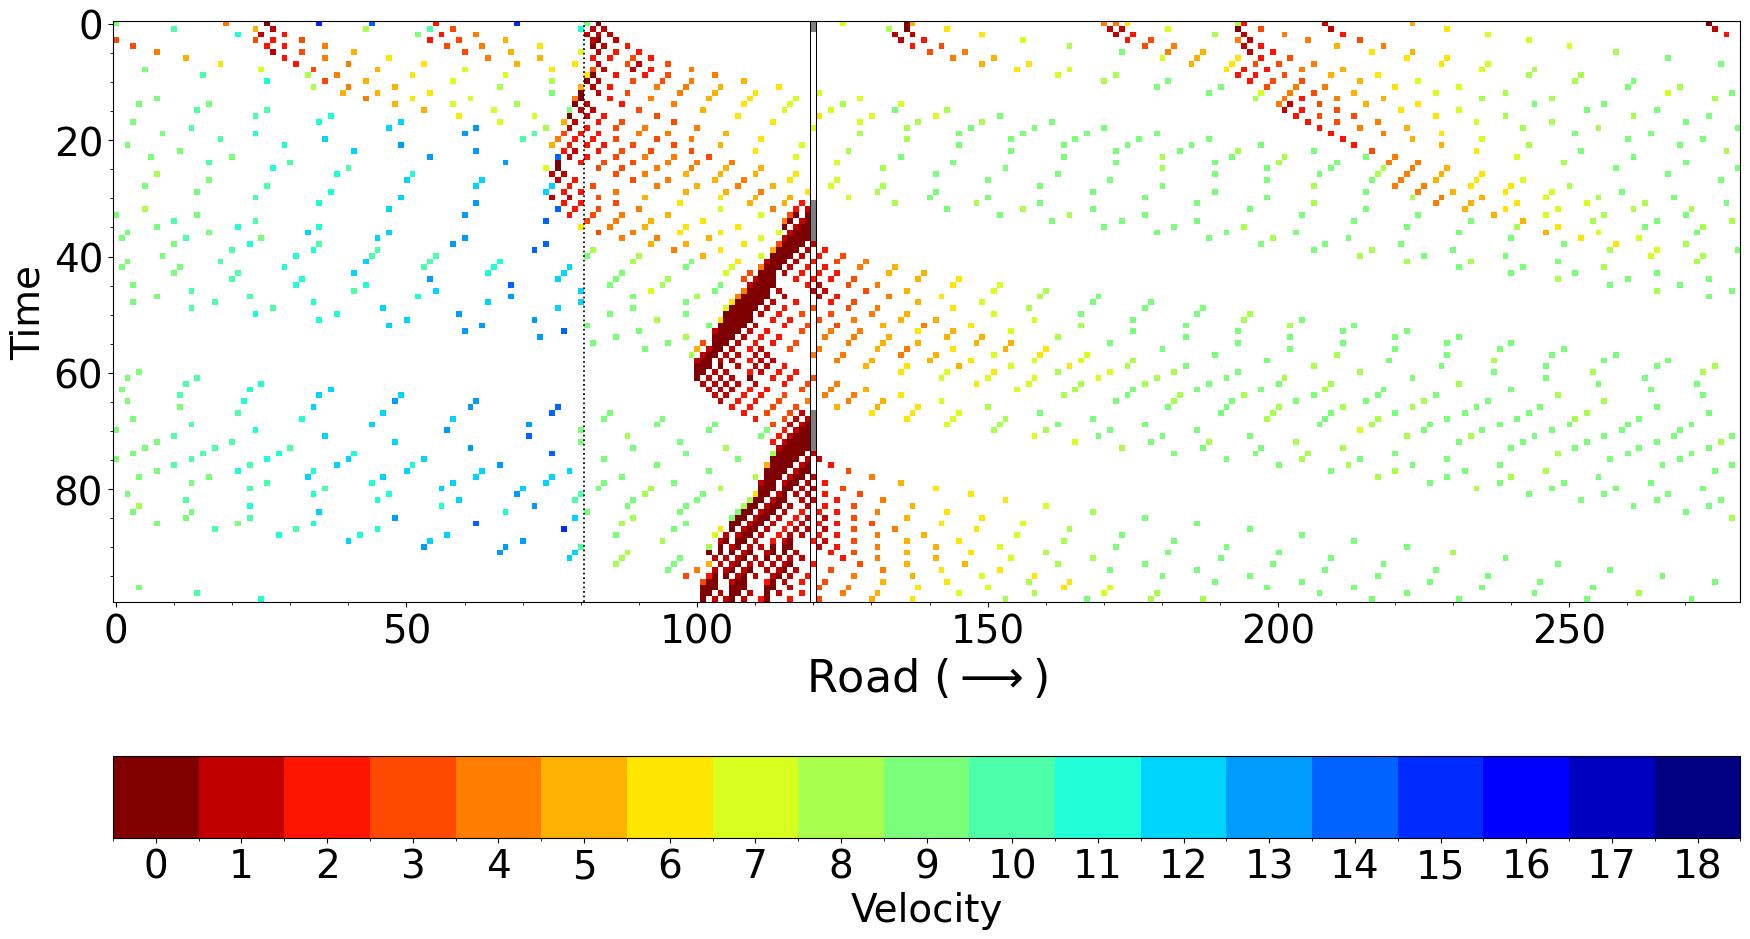

In [21]:
fig, ax = plt.subplots(figsize = (21,20))
print("flow rate:",simulation1[2])
print("average range of speeds per iteration: ", simulation1[4])
plot_road_with_lights(roads = simulation1[0], traffic_light_roads = simulation1[1], 
                      light_positions = light_positions, limit_boundaries = limit_boundaries, 
                      vmax = max(road_speed_limit_list), nt = nt, L = len(road_speed_limit_list))


# TESTING REAL WORLD DATA

In [78]:
random.seed(123) # DO NOT TOUCH THIS
L = 500
n_cars = L/4
nt = 400

# limit_boundaries = [240] # speed limits
region_lengths = [500]
region_speed_limits = [9]
# light_positions = [70, 114]
light_positions = [70, 200]
# nt = 100
car_slow_down_prob = 0.127
# road_speed_limit_list = ([region_speed_limits[0]]*region_lengths[0]) + ([region_speed_limits[1]]*region_lengths[1]) # + ([18]*40) # You can create a list like this [speed_limit of road] * (how many blocks)
# density = 15/len(road_speed_limit_list)

# # this is (traffic light position, green time, red time, starting time): reduce diff between green and red time to increase red light signals
traffic_light_list = [(light_positions[0], 2, 0), (light_positions[1],2,0)]

In [79]:
simulation = simulate_traffic_lights(region_lengths, region_speed_limits, 
                                     n_cars, nt, car_slow_down_prob, 
                                     traffic_light_list, random = True)
print(simulation[2])

0.5375


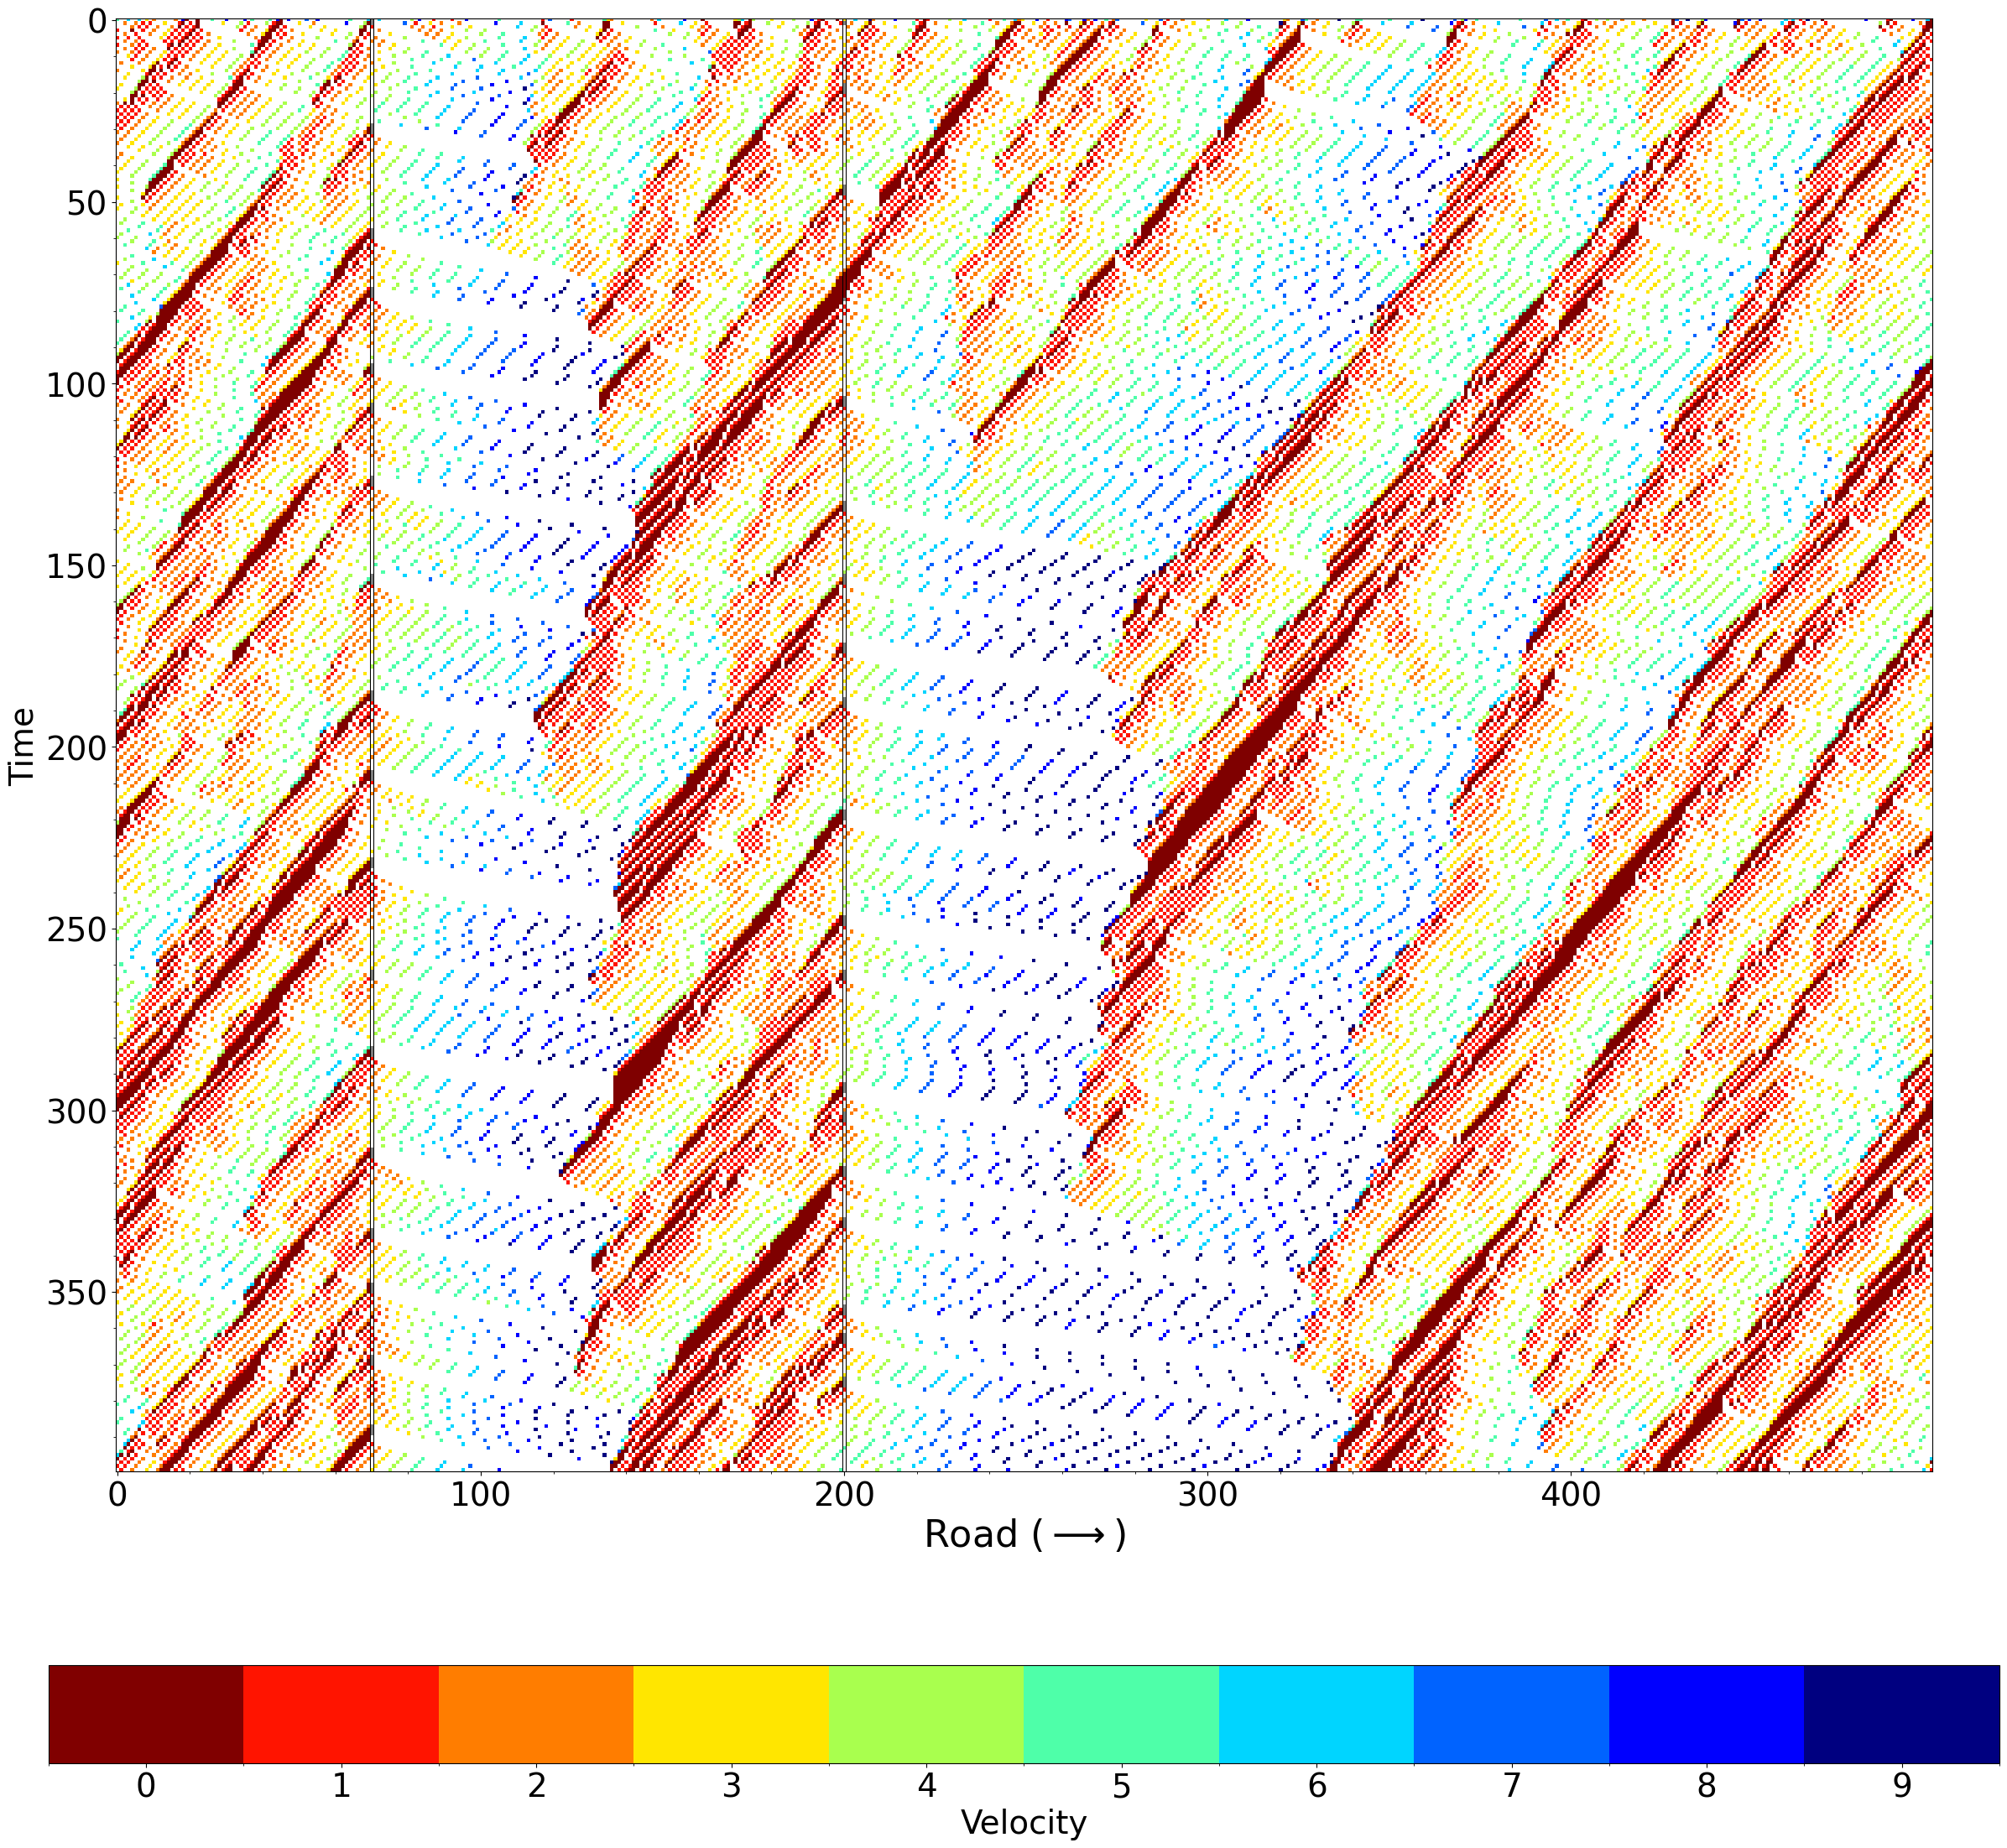

In [80]:

fig, ax = plt.subplots(figsize = (30,30))
plot_road_with_lights(roads = simulation[0], traffic_light_roads=simulation[1], 
                      nt =nt, light_positions = light_positions, limit_boundaries = None, 
                      vmax = region_speed_limits[0], L = L, 
                      traffic_light_list=traffic_light_list)

## Checking variations of SL and TL combinations

### Things to check:
- Position of traffic lights on the road, i.e. does having lights at the end help more than at the beginning? How noticeable is the difference, if it even exists?
- Impact of reducing speed limits near traffic lights to ensure consistent traffic flow. Is this actually feasible and does it have the expected desired impact? (need to be mindful of speed limit regulations here)
- Finding the optimal speed limit for the length of road and density we've chosen. This would naturally be decided by several other factors as well, but they're not in the scope of this project.


**Here, we're also assuming that each iteration is roughly 4s long.**

Also assume that the road is busy, and we have automated crossing lights. So every 60s they will turn red for around 25s to allow pedestrians to cross.

#### Variables which are kept constant throughout:
- No. of timesteps = **100**
- Speed Limit = **30mph** for the whole road
- Road Length = **240** sites (roughly 0.96km)
- Probability of driver error = **0.127**

### Position of Traffic Light

In [44]:
random.seed(123) # DO NOT TOUCH THIS

##### SETUP INFORMATION #####

nt = 100
red_time = 6  # giving pdestrians roughly 25s to cross
green_time = red_time + 15 # gives cars around a minute between red lights
starting_time = 0
car_slow_down_prob = 0.127  # standard value for error from some paper (need ref)
region_lengths = np.array([240])  # only one speed limit everywhere
region_speed_limits = [14]  # setting speed limit to roughly 30mph

n_cars_list = np.linspace(1,sum(region_lengths), 20).astype(int)
densities = n_cars_list/sum(region_lengths)

varying_light_positions = np.linspace(0, sum(region_lengths) - 1, 5).astype(int)


FR_density_pos = []
VR_density_pos = []
SPI_density_pos = []

for pos in varying_light_positions:
    FR_n_cars = []
    VR_n_cars = []
    SPI_n_cars = []
    for n_cars in n_cars_list:
        light_positions = [pos]
        traffic_light_list = [(light_positions[0], green_time, red_time, starting_time, False)]
        
        simulation = simulate_traffic_lights(region_lengths, region_speed_limits, 
                                            n_cars, nt, car_slow_down_prob, 
                                            traffic_light_list)
        FR_n_cars.append(simulation[2])
        VR_n_cars.append(simulation[3])
        SPI_n_cars.append(simulation[4])
        
    FR_density_pos.append(FR_n_cars)
    VR_density_pos.append(VR_n_cars)
    SPI_density_pos.append(SPI_n_cars)

### Red/Green Cycle Times


#### Varying Red Time
Reasonable range for red times should be around 20s to 100s depending on the junction and road (the range is also easier to discretize). Will keep green times to just 60s regardless of the red time as that is generally a reasonable time for traffic lights to be green anywhere in the city (imo).

In [45]:
random.seed(123) # DO NOT TOUCH THIS

##### SETUP INFORMATION #####

nt = 100
starting_time = 0
car_slow_down_prob = 0.127  # standard value for error from some paper (need ref)
region_lengths = np.array([240])  # only one speed limit everywhere
region_speed_limits = [14]  # setting speed limit to roughly 30mph
light_positions = [140]

red_time_list = np.linspace(5, 25 + 1, 5).astype(int)
n_cars_list = np.linspace(1, sum(region_lengths), 20).astype(int)
densities = n_cars_list/sum(region_lengths)

FR_density_r_times = []
VR_density_r_times = []
SPI_density_r_times = []

for red_time in red_time_list:
    FR_n_cars = []
    VR_n_cars = []
    SPI_n_cars = []
    for n_cars in n_cars_list:
        red_time = red_time
        green_time = red_time + 15
        traffic_light_list = [(light_positions[0], green_time, red_time, starting_time, False)]
        
        simulation = simulate_traffic_lights(region_lengths, region_speed_limits, 
                                            n_cars, nt, car_slow_down_prob, 
                                            traffic_light_list)
        FR_n_cars.append(simulation[2])
        VR_n_cars.append(simulation[3])
        SPI_n_cars.append(simulation[4])
    FR_density_r_times.append(FR_n_cars)
    VR_density_r_times.append(VR_n_cars)
    SPI_density_r_times.append(SPI_n_cars)

#### Varying Green Time

Here, we'll choose one of the better red values from the plot above and keep red time constant. We choose 6 here as that gives pedestrians around 24s to cross the road, which should be ample time for most people on a single carriageway. Then, we can vary green time to be anywhere from 40s to 120s. Again, in the real world, this would depend on the road but having the data would be useful nonetheless.

In [46]:
random.seed(123) # DO NOT TOUCH THIS

##### SETUP INFORMATION #####

nt = 100
starting_time = 0
car_slow_down_prob = 0.127  # standard value for error from some paper (need ref)
region_lengths = np.array([240])  # only one speed limit everywhere
region_speed_limits = [14]  # setting speed limit to roughly 30mph
light_positions = [140]
red_time = 6

green_time_diff = np.arange(10, 30 + 1, 5).astype(int)
n_cars_list = np.linspace(1, sum(region_lengths), 20).astype(int)
# n_cars_list = np.linspace(0, sum(region_lengths), 100).astype(int)
densities = n_cars_list/sum(region_lengths)

FR_density_g_times = []
VR_density_g_times = []
SPI_density_g_times = []

for diff in green_time_diff:
    FR_n_cars = []
    VR_n_cars = []
    SPI_n_cars = []
    for n_cars in n_cars_list:
        red_time = red_time
        green_time = red_time + diff
        traffic_light_list = [(light_positions[0], green_time, red_time, starting_time, False)]
        
        simulation = simulate_traffic_lights(region_lengths, region_speed_limits, 
                                            n_cars, nt, car_slow_down_prob, 
                                            traffic_light_list)
        FR_n_cars.append(simulation[2])
        VR_n_cars.append(simulation[3])
        SPI_n_cars.append(simulation[4])
    FR_density_g_times.append(FR_n_cars)
    VR_density_g_times.append(VR_n_cars)
    SPI_density_g_times.append(SPI_n_cars)

## Incorporating a second traffic light into the model

Since we have periodic boundary conditions, this is not as simple as taking one traffic light on one end and then mobilising the other. So, say, if one traffic light was on site 1 (0 in the code), then the maximum distance the second traffic light could have from it would be $L/2$. So we can then fix one traffic light in this simulation and move the other one till the halfway point $(L/2)$.

One other thing to note is the cycle time differences between the two lights. To do this, again, we can set one to be fixed and then vary the times for the other one to see how it behaves.

All of these tests will require multiple assumptions, and it might be worth seeing how we could either expand on these or maybe look into more important factors and test those instead. It will also be worth combining a lot of these visualisations to save some space.

In [47]:
random.seed(123) # DO NOT TOUCH THIS

##### SETUP INFORMATION #####

nt = 100
red_time = 6  # giving pdestrians roughly 25s to cross
green_time = red_time + 15 # gives cars around a minute between red lights
starting_time = 0
car_slow_down_prob = 0.127  # standard value for error from some paper (need ref)
region_lengths = np.array([240])  # only one speed limit everywhere
region_speed_limits = [14]  # setting speed limit to roughly 30mph

road_length = sum(region_lengths)

n_cars_list = np.linspace(1, sum(region_lengths), 20).astype(int)
densities = n_cars_list/road_length

light1_position = 0
light2_positions = np.linspace(1, road_length/2 + 1, 5).astype(int)

FR_density_pos_2TL = []
VR_density_pos_2TL = []
SPI_density_pos_2TL = []

for pos2 in light2_positions:
    FR_n_cars = []
    VR_n_cars = []
    SPI_n_cars = []
    for n_cars in n_cars_list:
        light_positions = [light1_position, pos2]
        traffic_light_list = [(light_positions[0], green_time, red_time, starting_time, False),
                              (light_positions[1], green_time, red_time, starting_time, False)]
        
        simulation = simulate_traffic_lights(region_lengths, region_speed_limits, 
                                            n_cars, nt, car_slow_down_prob, 
                                            traffic_light_list)
        FR_n_cars.append(simulation[2])
        VR_n_cars.append(simulation[3])
        SPI_n_cars.append(simulation[4])
    FR_density_pos_2TL.append(FR_n_cars)
    VR_density_pos_2TL.append(VR_n_cars)
    SPI_density_pos_2TL.append(SPI_n_cars)

## PLOTTING TRAFFIC LIGHT TESTS

### Flow Rate Plots

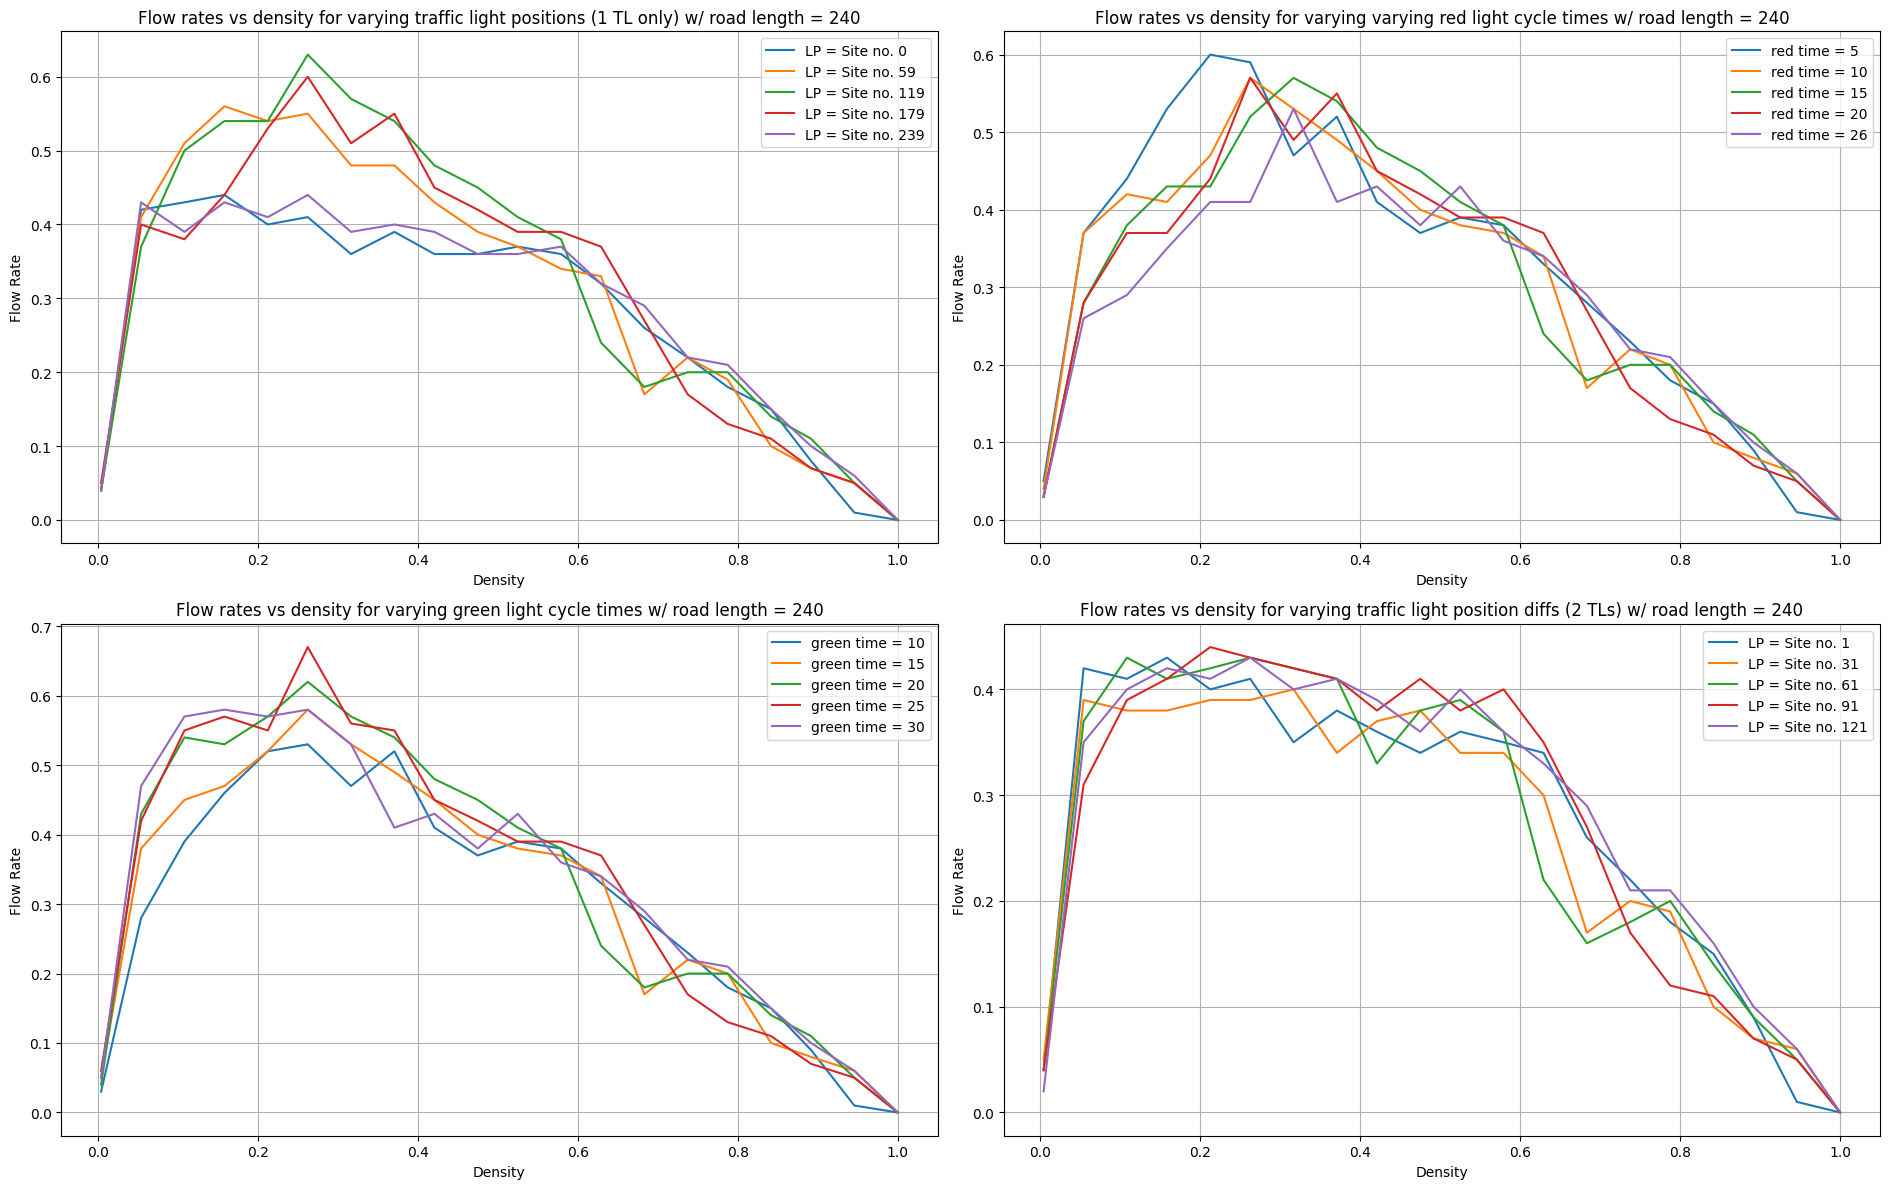

In [48]:
fig, ax = plt.subplots(2, 2, figsize = (19, 12))

for i in range(len(FR_density_pos)):
    # print(f"max flow rate for TL at site no. {varying_light_positions[i]}: ", max(FR_density_pos[i]))
    ax[0,0].plot(densities, FR_density_pos[i], label = f"LP = Site no. {varying_light_positions[i]}")
    ax[0,0].legend()
    ax[0,0].set(title = f"Flow rates vs density for varying traffic light positions (1 TL only) w/ road length = 240",
           xlabel = "Density", ylabel = "Flow Rate")
ax[0,0].grid(True)


for i in range(len(FR_density_r_times)):
    # print(f"max flow rate for TL with red light cycle time ({red_time_list[i]}*4)s: ", max(FR_density_r_times[i]))
    ax[0,1].plot(densities, FR_density_r_times[i], label = f"red time = {red_time_list[i]}")
    ax[0,1].legend()
    ax[0,1].set(title = f"Flow rates vs density for varying varying red light cycle times w/ road length = 240",
           xlabel = "Density", ylabel = "Flow Rate")
ax[0,1].grid(True)
    
for i in range(len(FR_density_g_times)):
    # print(f"max flow rate for TL with green light cycle time ({green_time_diff[i]}*4)s: ", max(FR_density_g_times[i]))
    ax[1,0].plot(densities, FR_density_g_times[i], label = f"green time = {green_time_diff[i]}")
    ax[1,0].legend()
    ax[1,0].set(title = f"Flow rates vs density for varying green light cycle times w/ road length = 240",
           xlabel = "Density", ylabel = "Flow Rate")
ax[1,0].grid(True)

for i in range(len(FR_density_pos_2TL)):
    # print(f"max flow rate for TL2 at site no. {light2_positions[i]}: ", max(FR_density_pos_2TL[i]))
    ax[1,1].plot(densities, FR_density_pos_2TL[i], label = f"LP = Site no. {light2_positions[i]}")
    ax[1,1].legend()
    ax[1,1].set(title = f"Flow rates vs density for varying traffic light position diffs (2 TLs) w/ road length = 240",
           xlabel = "Density", ylabel = "Flow Rate")
ax[1,1].grid(True)

plt.tight_layout()
plt.show()

### Average Speed Range Plots

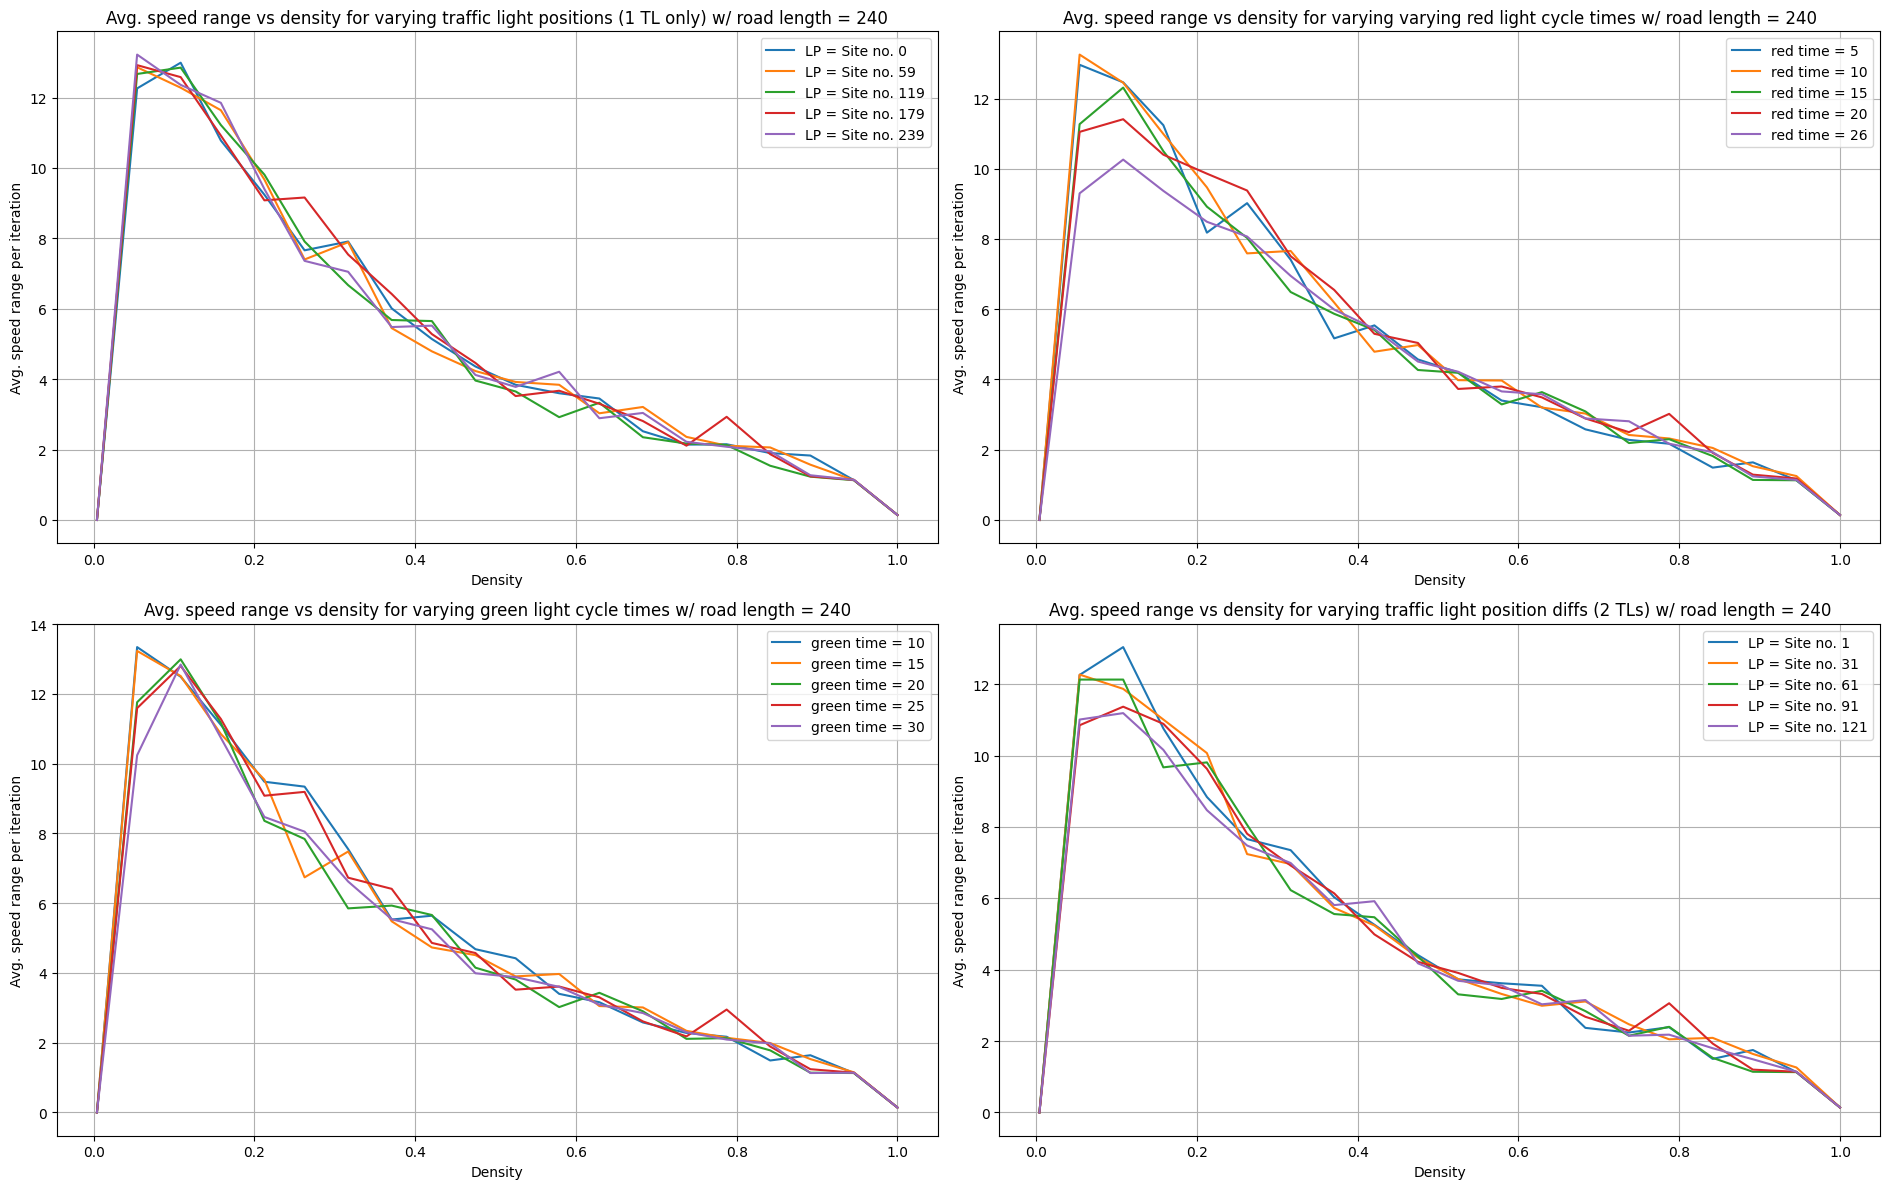

In [49]:
fig, ax = plt.subplots(2, 2, figsize = (19, 12))

for i in range(len(VR_density_pos)):
    # print(f"Max avg speed range for TL at site no. {varying_light_positions[i]}: ", max(VR_density_pos[i]))
    ax[0,0].plot(densities, VR_density_pos[i], label = f"LP = Site no. {varying_light_positions[i]}")
    ax[0,0].legend()
    ax[0,0].set(title = f"Avg. speed range vs density for varying traffic light positions (1 TL only) w/ road length = 240",
           xlabel = "Density", ylabel = "Avg. speed range per iteration")
ax[0,0].grid(True)


for i in range(len(VR_density_r_times)):
    # print(f"Max avg. speed range for TL with red light cycle time ({red_time_list[i]}*4)s: ", max(VR_density_r_times[i]))
    ax[0,1].plot(densities, VR_density_r_times[i], label = f"red time = {red_time_list[i]}")
    ax[0,1].legend()
    ax[0,1].set(title = f"Avg. speed range vs density for varying varying red light cycle times w/ road length = 240",
           xlabel = "Density", ylabel = "Avg. speed range per iteration")
ax[0,1].grid(True)
    
for i in range(len(VR_density_g_times)):
    # print(f"Max avg speed range for TL with green light cycle time ({green_time_diff[i]}*4)s: ", max(VR_density_g_times[i]))
    ax[1,0].plot(densities, VR_density_g_times[i], label = f"green time = {green_time_diff[i]}")
    ax[1,0].legend()
    ax[1,0].set(title = f"Avg. speed range vs density for varying green light cycle times w/ road length = 240",
           xlabel = "Density", ylabel = "Avg. speed range per iteration")
ax[1,0].grid(True)

for i in range(len(VR_density_pos_2TL)):
    # print(f"Max avg speed range for TL2 at site no. {light2_positions[i]}: ", max(VR_density_pos_2TL[i]))
    ax[1,1].plot(densities, VR_density_pos_2TL[i], label = f"LP = Site no. {light2_positions[i]}")
    ax[1,1].legend()
    ax[1,1].set(title = f"Avg. speed range vs density for varying traffic light position diffs (2 TLs) w/ road length = 240",
           xlabel = "Density", ylabel = "Avg. speed range per iteration")
ax[1,1].grid(True)

plt.tight_layout()
plt.show()

### SPI Plots

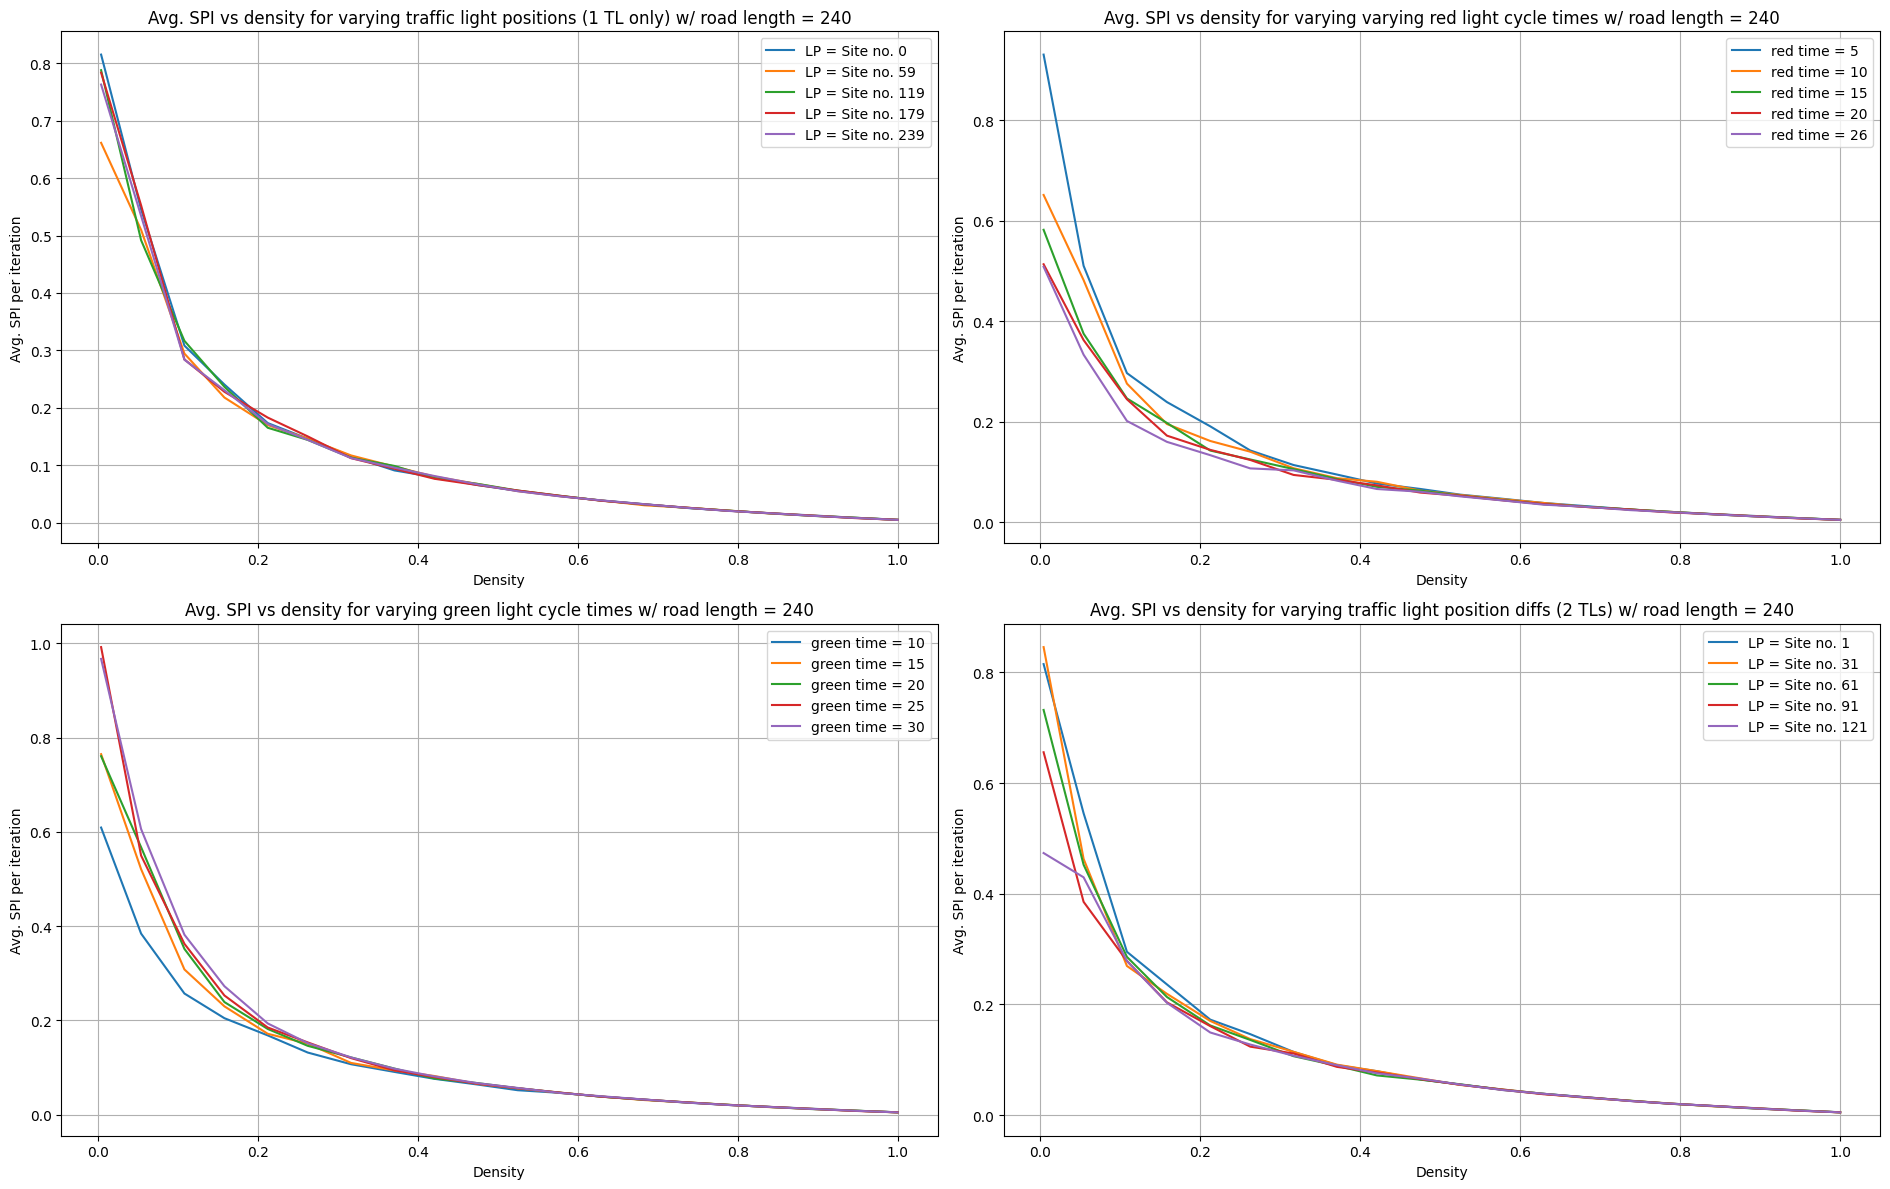

In [50]:
fig, ax = plt.subplots(2, 2, figsize = (19, 12))

for i in range(len(SPI_density_pos)):
    # print(f"Max avg SPI for TL at site no. {varying_light_positions[i]}: ", max(SPI_density_pos[i]))
    ax[0,0].plot(densities, SPI_density_pos[i], label = f"LP = Site no. {varying_light_positions[i]}")
    ax[0,0].legend()
    ax[0,0].set(title = f"Avg. SPI vs density for varying traffic light positions (1 TL only) w/ road length = 240",
           xlabel = "Density", ylabel = "Avg. SPI per iteration")
ax[0,0].grid(True)


for i in range(len(SPI_density_r_times)):
    # print(f"Max avg SPI for TL with red light cycle time ({red_time_list[i]}*4)s: ", max(SPI_density_r_times[i]))
    ax[0,1].plot(densities, SPI_density_r_times[i], label = f"red time = {red_time_list[i]}")
    ax[0,1].legend()
    ax[0,1].set(title = f"Avg. SPI vs density for varying varying red light cycle times w/ road length = 240",
           xlabel = "Density", ylabel = "Avg. SPI per iteration")
ax[0,1].grid(True)
    
for i in range(len(SPI_density_g_times)):
    # print(f"Max avg SPI for TL with green light cycle time ({green_time_diff[i]}*4)s: ", max(SPI_density_g_times[i]))
    ax[1,0].plot(densities, SPI_density_g_times[i], label = f"green time = {green_time_diff[i]}")
    ax[1,0].legend()
    ax[1,0].set(title = f"Avg. SPI vs density for varying green light cycle times w/ road length = 240",
           xlabel = "Density", ylabel = "Avg. SPI per iteration")
ax[1,0].grid(True)

for i in range(len(SPI_density_pos_2TL)):
    # print(f"Max avg SPI for TL2 at site no. {light2_positions[i]}: ", max(SPI_density_pos_2TL[i]))
    ax[1,1].plot(densities, SPI_density_pos_2TL[i], label = f"LP = Site no. {light2_positions[i]}")
    ax[1,1].legend()
    ax[1,1].set(title = f"Avg. SPI vs density for varying traffic light position diffs (2 TLs) w/ road length = 240",
           xlabel = "Density", ylabel = "Avg. SPI per iteration")
ax[1,1].grid(True)

plt.tight_layout()
plt.show()

# Plotting against other parameters

### Light Positions

In [51]:
random.seed(123) # DO NOT TOUCH THIS

##### SETUP INFORMATION #####

nt = 100
starting_time = 0
red_time = 6  # giving pdestrians roughly 25s to cross
green_time = red_time + 15 # gives cars around a minute between red lights
car_slow_down_prob = 0.127  # standard value for error from some paper (need ref)
region_lengths = np.array([480])  # only one speed limit everywhere
region_speed_limits = [14]  # setting speed limit to roughly 30mph

n_cars_list = np.linspace(1,sum(region_lengths), 5).astype(int)
densities = n_cars_list/sum(region_lengths)

varying_light_positions = np.linspace(0, sum(region_lengths)-1, 10).astype(int)

FR_params_pos = []
VR_params_pos = []
SPI_params_pos = []


for n_cars in n_cars_list:
    FR_n_cars = []
    VR_n_cars = []
    SPI_n_cars = []
    for pos in varying_light_positions:
        light_positions = [pos]
        traffic_light_list = [(light_positions[0], green_time, red_time, starting_time, False)]
        
        simulation = simulate_traffic_lights(region_lengths, region_speed_limits, 
                                            n_cars, nt, car_slow_down_prob, 
                                            traffic_light_list)
        FR_n_cars.append(simulation[2])
        VR_n_cars.append(simulation[3])
        SPI_n_cars.append(simulation[4])
    print("loop done for ", n_cars, " cars!")    
    FR_params_pos.append(FR_n_cars)
    VR_params_pos.append(VR_n_cars)
    SPI_params_pos.append(SPI_n_cars)

loop done for  1  cars!
loop done for  120  cars!
loop done for  240  cars!
loop done for  360  cars!
loop done for  480  cars!


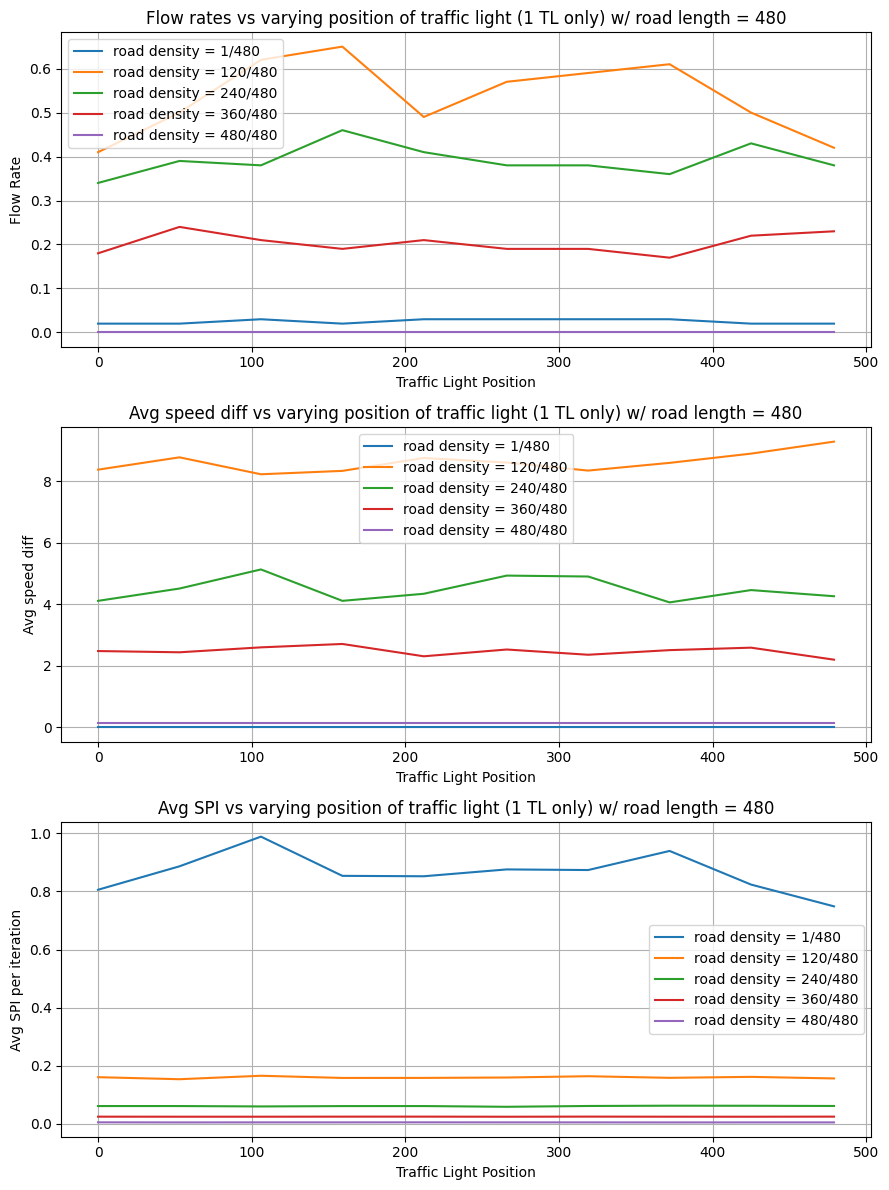

In [52]:
fig, ax = plt.subplots(3,1,figsize = (9, 12))

plt.style.use("default")

for i in range(len(FR_density_r_times)):
#     print(f"max flow rate for TL with green light cycle time ({red_time_list[i]}*4)s: ", max(FR_density_r_times[i]))
    ax[0].plot(varying_light_positions, FR_params_pos[i], label = f"road density = {n_cars_list[i]}/480")
    ax[0].legend()
    ax[0].set(title = f"Flow rates vs varying position of traffic light (1 TL only) w/ road length = 480",
           xlabel = "Traffic Light Position", ylabel = "Flow Rate")
    ax[1].plot(varying_light_positions, VR_params_pos[i], label = f"road density = {n_cars_list[i]}/480")
    ax[1].legend()
    ax[1].set(title = f"Avg speed diff vs varying position of traffic light (1 TL only) w/ road length = 480",
           xlabel = "Traffic Light Position", ylabel = "Avg speed diff")
    ax[2].plot(varying_light_positions, SPI_params_pos[i], label = f"road density = {n_cars_list[i]}/480")
    ax[2].legend()
    ax[2].set(title = f"Avg SPI vs varying position of traffic light (1 TL only) w/ road length = 480",
           xlabel = "Traffic Light Position", ylabel = "Avg SPI per iteration")
ax[0].grid()
ax[1].grid()
ax[2].grid()
plt.tight_layout()

### Varying Red Times

In [53]:
random.seed(123) # DO NOT TOUCH THIS

##### SETUP INFORMATION #####

nt = 100
starting_time = 0
car_slow_down_prob = 0.127  # standard value for error from some paper (need ref)
region_lengths = np.array([480])  # only one speed limit everywhere
region_speed_limits = [14]  # setting speed limit to roughly 30mph
light_positions = [140]
# red_time = 6

red_time_list = np.linspace(5, 25 + 1, 10).astype(int)
n_cars_list = np.linspace(1,sum(region_lengths), 5).astype(int)
densities = n_cars_list/sum(region_lengths)

FR_params_r_times = []
VR_params_r_times = []
SPI_params_r_times = []

for n_cars in n_cars_list:
    FR_n_cars = []
    VR_n_cars = []
    SPI_n_cars = []
    for red_time in red_time_list:
        red_time = red_time
        green_time = red_time + 15
        traffic_light_list = [(light_positions[0], green_time, red_time, starting_time, False)]
        
        simulation = simulate_traffic_lights(region_lengths, region_speed_limits, 
                                            n_cars, nt, car_slow_down_prob, 
                                            traffic_light_list)
        FR_n_cars.append(simulation[2])
        VR_n_cars.append(simulation[3])
        SPI_n_cars.append(simulation[4])
    print("loop done for ", n_cars, " cars!")
    FR_params_r_times.append(FR_n_cars)
    VR_params_r_times.append(VR_n_cars)
    SPI_params_r_times.append(SPI_n_cars)

loop done for  1  cars!
loop done for  120  cars!
loop done for  240  cars!
loop done for  360  cars!
loop done for  480  cars!


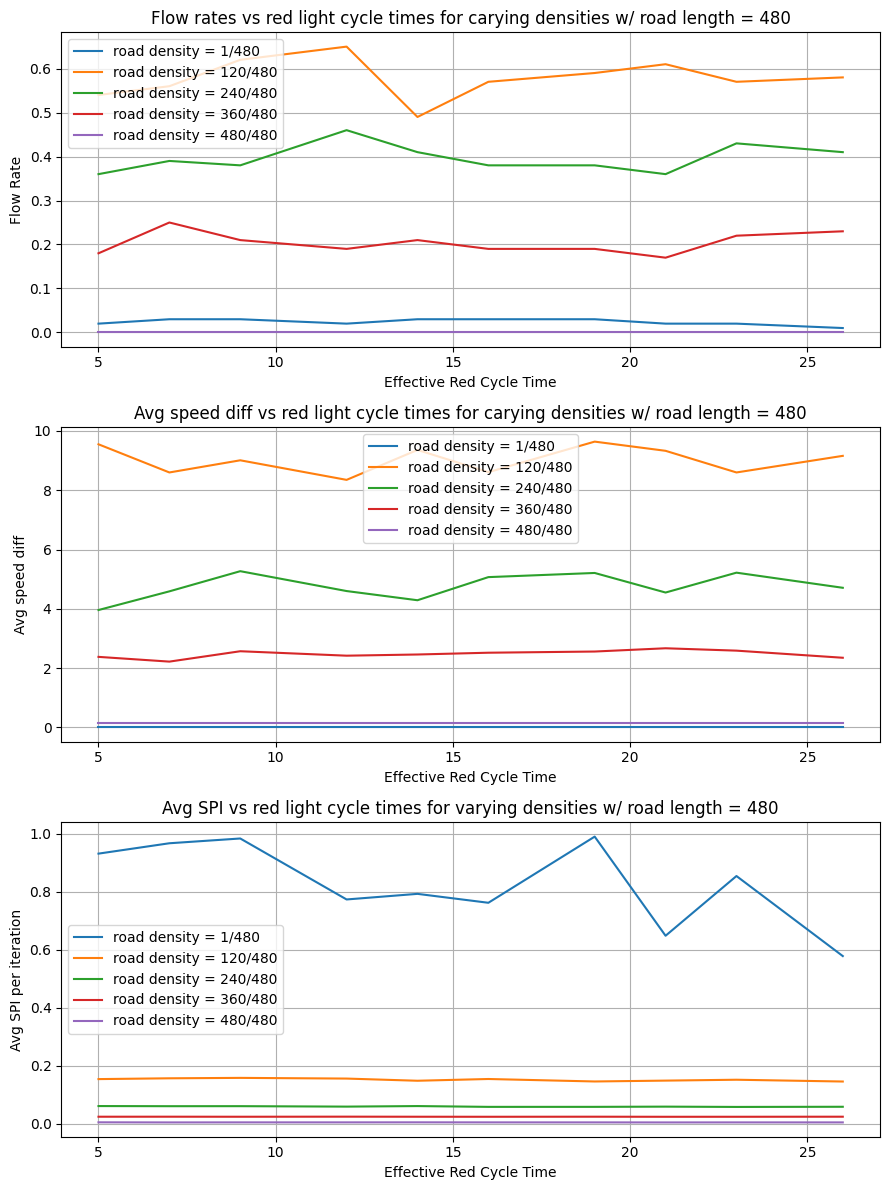

In [54]:
fig, ax = plt.subplots(3,1,figsize = (9, 12))

plt.style.use("default")

for i in range(len(FR_density_r_times)):
#     print(f"max flow rate for TL with green light cycle time ({red_time_list[i]}*4)s: ", max(FR_density_r_times[i]))
    ax[0].plot(red_time_list, FR_params_r_times[i], label = f"road density = {n_cars_list[i]}/480")
    ax[0].legend()
    ax[0].set(title = f"Flow rates vs red light cycle times for carying densities w/ road length = 480",
           xlabel = "Effective Red Cycle Time", ylabel = "Flow Rate")
    ax[1].plot(red_time_list, VR_params_r_times[i], label = f"road density = {n_cars_list[i]}/480")
    ax[1].legend()
    ax[1].set(title = f"Avg speed diff vs red light cycle times for carying densities w/ road length = 480",
           xlabel = "Effective Red Cycle Time", ylabel = "Avg speed diff")
    ax[2].plot(red_time_list, SPI_params_r_times[i], label = f"road density = {n_cars_list[i]}/480")
    ax[2].legend()
    ax[2].set(title = f"Avg SPI vs red light cycle times for varying densities w/ road length = 480",
           xlabel = "Effective Red Cycle Time", ylabel = "Avg SPI per iteration")
ax[0].grid()
ax[1].grid()
ax[2].grid()
plt.tight_layout()

### Varying Green Times

In [55]:
random.seed(123) # DO NOT TOUCH THIS

##### SETUP INFORMATION #####

nt = 100
starting_time = 0
car_slow_down_prob = 0.127  # standard value for error from some paper (need ref)
region_lengths = np.array([480])  # only one speed limit everywhere
region_speed_limits = [14]  # setting speed limit to roughly 30mph
light_positions = [140]
red_time = 6

green_time_diff = np.linspace(10, 30 + 1, 10).astype(int)
n_cars_list = np.linspace(1,sum(region_lengths), 5).astype(int)
densities = n_cars_list/sum(region_lengths)

FR_params_g_times = []
VR_params_g_times = []
SPI_params_g_times = []

for n_cars in n_cars_list:
    FR_n_cars = []
    VR_n_cars = []
    SPI_n_cars = []
    for diff in green_time_diff:
        green_time = red_time + diff
        traffic_light_list = [(light_positions[0], green_time, red_time, starting_time, False)]
        
        simulation = simulate_traffic_lights(region_lengths, region_speed_limits, 
                                            n_cars, nt, car_slow_down_prob, 
                                            traffic_light_list)
        FR_n_cars.append(simulation[2])
        VR_n_cars.append(simulation[3])
        SPI_n_cars.append(simulation[4])
    print("loop done for ", n_cars, " cars!")
    FR_params_g_times.append(FR_n_cars)
    VR_params_g_times.append(VR_n_cars)
    SPI_params_g_times.append(SPI_n_cars)

loop done for  1  cars!
loop done for  120  cars!
loop done for  240  cars!
loop done for  360  cars!
loop done for  480  cars!


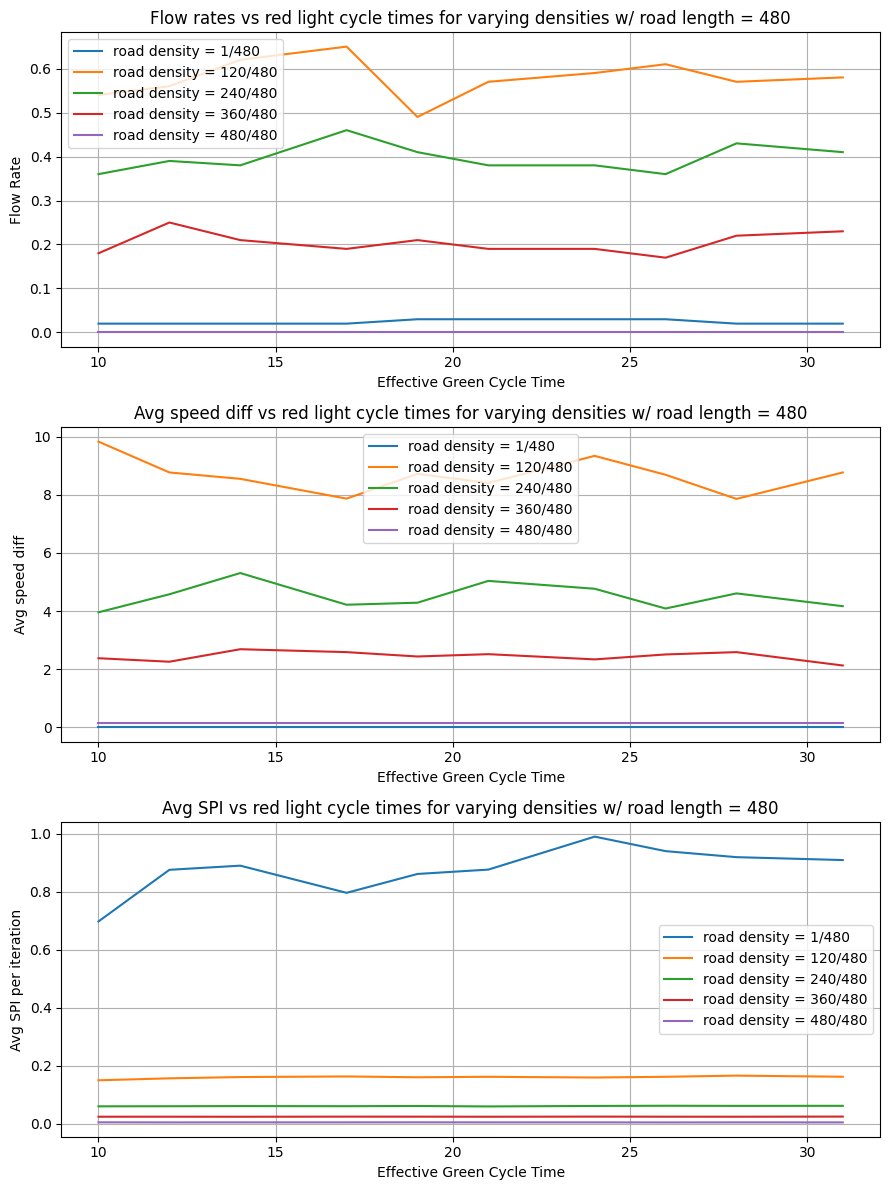

In [56]:
fig, ax = plt.subplots(3,1,figsize = (9, 12))

plt.style.use("default")

for i in range(len(FR_density_r_times)):
#     print(f"max flow rate for TL with green light cycle time ({red_time_list[i]}*4)s: ", max(FR_density_r_times[i]))
    ax[0].plot(green_time_diff, FR_params_g_times[i], label = f"road density = {n_cars_list[i]}/480")
    ax[0].legend()
    ax[0].set(title = f"Flow rates vs red light cycle times for varying densities w/ road length = 480",
           xlabel = "Effective Green Cycle Time", ylabel = "Flow Rate")
    ax[1].plot(green_time_diff, VR_params_g_times[i], label = f"road density = {n_cars_list[i]}/480")
    ax[1].legend()
    ax[1].set(title = f"Avg speed diff vs red light cycle times for varying densities w/ road length = 480",
           xlabel = "Effective Green Cycle Time", ylabel = "Avg speed diff")
    ax[2].plot(green_time_diff, SPI_params_g_times[i], label = f"road density = {n_cars_list[i]}/480")
    ax[2].legend()
    ax[2].set(title = f"Avg SPI vs red light cycle times for varying densities w/ road length = 480",
           xlabel = "Effective Green Cycle Time", ylabel = "Avg SPI per iteration")
ax[0].grid()
ax[1].grid()
ax[2].grid()
plt.tight_layout()

### Varying Position of Second Traffic Light

In [57]:
random.seed(123) # DO NOT TOUCH THIS

##### SETUP INFORMATION #####

nt = 100
red_time = 6  # giving pdestrians roughly 25s to cross
green_time = red_time + 15 # gives cars around a minute between red lights
starting_time = 0
car_slow_down_prob = 0.127  # standard value for error from some paper (need ref)
region_lengths = np.array([480])  # only one speed limit everywhere
region_speed_limits = [14]  # setting speed limit to roughly 30mph

road_length = sum(region_lengths)

n_cars_list = np.linspace(1, road_length, 5).astype(int)
densities = n_cars_list/road_length

light1_position = 0
light2_positions = np.linspace(1, road_length/2+1, 10).astype(int)

FR_params_pos_2TL = []
VR_params_pos_2TL = []
SPI_params_pos_2TL = []

for n_cars in n_cars_list:
    FR_n_cars = []
    VR_n_cars = []
    SPI_n_cars = []
    for pos2 in light2_positions:
        light_positions = [light1_position, pos2]
        traffic_light_list = [(light_positions[0], green_time, red_time, starting_time, False),
                              (light_positions[1], green_time, red_time, starting_time, False)]
        
        simulation = simulate_traffic_lights(region_lengths, region_speed_limits, 
                                            n_cars, nt, car_slow_down_prob, 
                                            traffic_light_list)
        FR_n_cars.append(simulation[2])
        VR_n_cars.append(simulation[3])
        SPI_n_cars.append(simulation[4])
    print("loop done for ", n_cars, " cars!")
    FR_params_pos_2TL.append(FR_n_cars)
    VR_params_pos_2TL.append(VR_n_cars)
    SPI_params_pos_2TL.append(SPI_n_cars)

loop done for  1  cars!
loop done for  120  cars!
loop done for  240  cars!
loop done for  360  cars!
loop done for  480  cars!


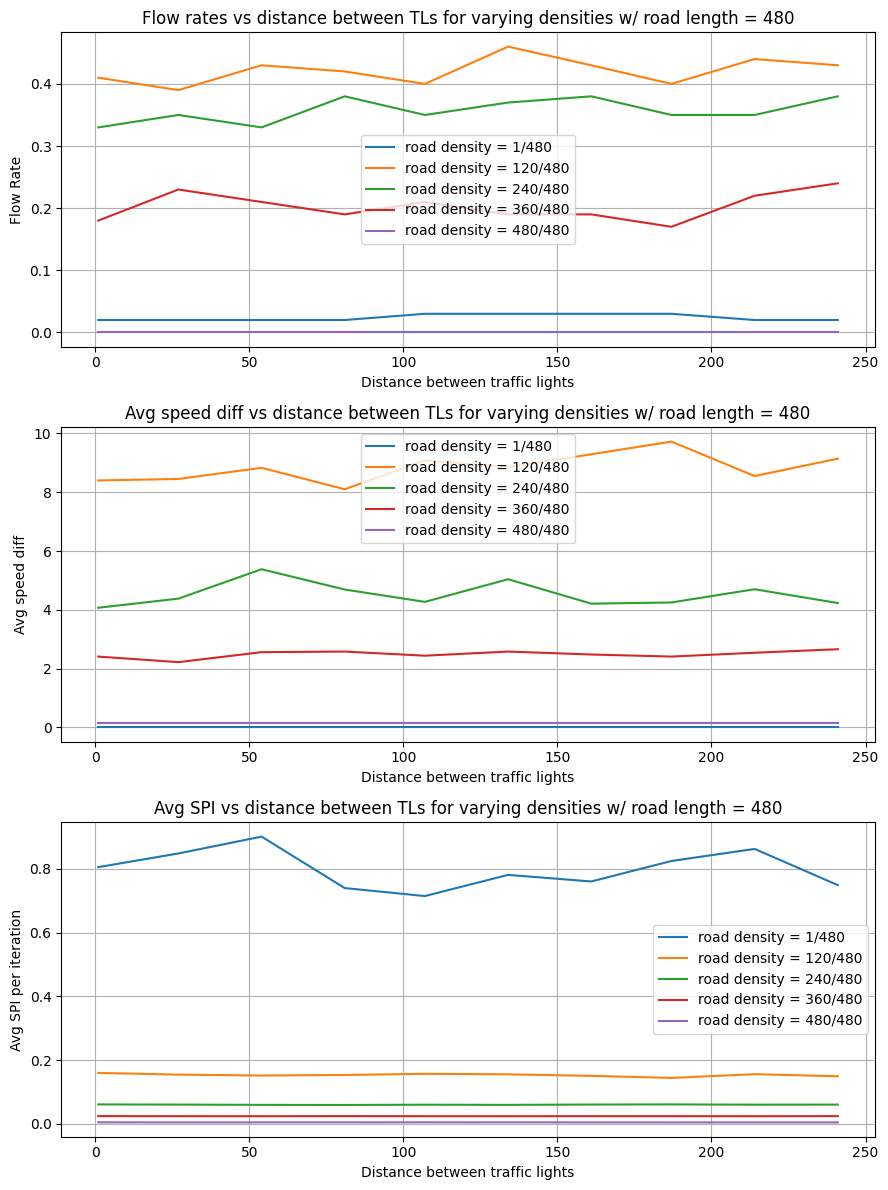

In [58]:
fig, ax = plt.subplots(3,1,figsize = (9, 12))

plt.style.use("default")

for i in range(len(FR_density_pos_2TL)):
#     print(f"max flow rate for distance = {light2_positions[i]} sites: ", max(FR_density_pos_2TL[i]))
    ax[0].plot(light2_positions, FR_params_pos_2TL[i], label = f"road density = {n_cars_list[i]}/480")
    ax[0].legend()
    ax[0].set(title = f"Flow rates vs distance between TLs for varying densities w/ road length = 480",
           xlabel = "Distance between traffic lights", ylabel = "Flow Rate")
    ax[1].plot(light2_positions, VR_params_pos_2TL[i], label = f"road density = {n_cars_list[i]}/480")
    ax[1].legend()
    ax[1].set(title = f"Avg speed diff vs distance between TLs for varying densities w/ road length = 480",
           xlabel = "Distance between traffic lights", ylabel = "Avg speed diff")
    ax[2].plot(light2_positions, SPI_params_pos_2TL[i], label = f"road density = {n_cars_list[i]}/480")
    ax[2].legend()
    ax[2].set(title = f"Avg SPI vs distance between TLs for varying densities w/ road length = 480",
           xlabel = "Distance between traffic lights", ylabel = "Avg SPI per iteration")
ax[0].grid()
ax[1].grid()
ax[2].grid()
plt.tight_layout()

# Road Type Tests

## York Road

The traffic lights on this road are given as follows:
1. Crossing at 304m (76)
2. Crossing at 967m (241)
3. Controlled light at 1,360m (340)
4. Crossing at 2,820m (705)
5. Controlled at 3,300m (825)
6. Controlled at 3,360m (840)
7. Controlled at 3,520m (880)
8. Crossing at 3,620m (905)
9. Controlled at 3,700m (925)
10. Crossing at 4,000m (1000)
11. Controlled at 4,130m (1033)
12. Controlled at 4,280m (1070)


The original speed limits on the road change at the 700m mark, from 30mph to 40mph. We propose one initial change to the road by reducing the speed limit as traffic approaches the sets of lights near the end of our road, from 40mph to 30mph again. 

In [9]:
random.seed(123)

#original road 
region_lengths = [175, 895]
limit_boundaries = [175]
region_speed_limits = [14, 18]

# our idea no1
# region_lengths = [175, 500, 395]
# limit_boundaries = [175, 675]
# region_speed_limits = [14, 18, 14]

# our idea no2
# region_lengths = [175, 175, 325, 395]
# limit_boundaries = [175, 350, 675]
# region_speed_limits = [14, 18, 23, 14]


n_cars = int(sum(region_lengths)/10)
nt = 200
car_slow_down_prob = 0.127
red_time = 6
green_time = red_time + 15
light_positions = [76, 241, 340, 705, 825, 880, 905, 1000, 1033, 1069]
traffic_light_list = [
    (76, green_time, red_time, 0, True),
    (241, green_time, red_time, 0, True),
    (340, green_time, red_time, 0, False),
    (705, green_time, red_time, 0, True),
    (825, green_time, red_time, 0, False),
    (840, green_time, red_time, 0, False),
    (880, green_time, red_time, 0, False),
    (905, green_time, red_time, 0, True),
    (925, green_time, red_time, 0, False),
    (1000, green_time, red_time, 0, True),
    (1033, green_time, red_time, 0, False),
    (1069, green_time, red_time, 0, False)
]

sim_york_rd = simulate_traffic_lights(region_lengths, region_speed_limits, 
                                     n_cars, nt, car_slow_down_prob, 
                                     traffic_light_list)

flow rate = 0.375
 average speed range = 17.435
 average SPI per iteration = 0.23912216288384514


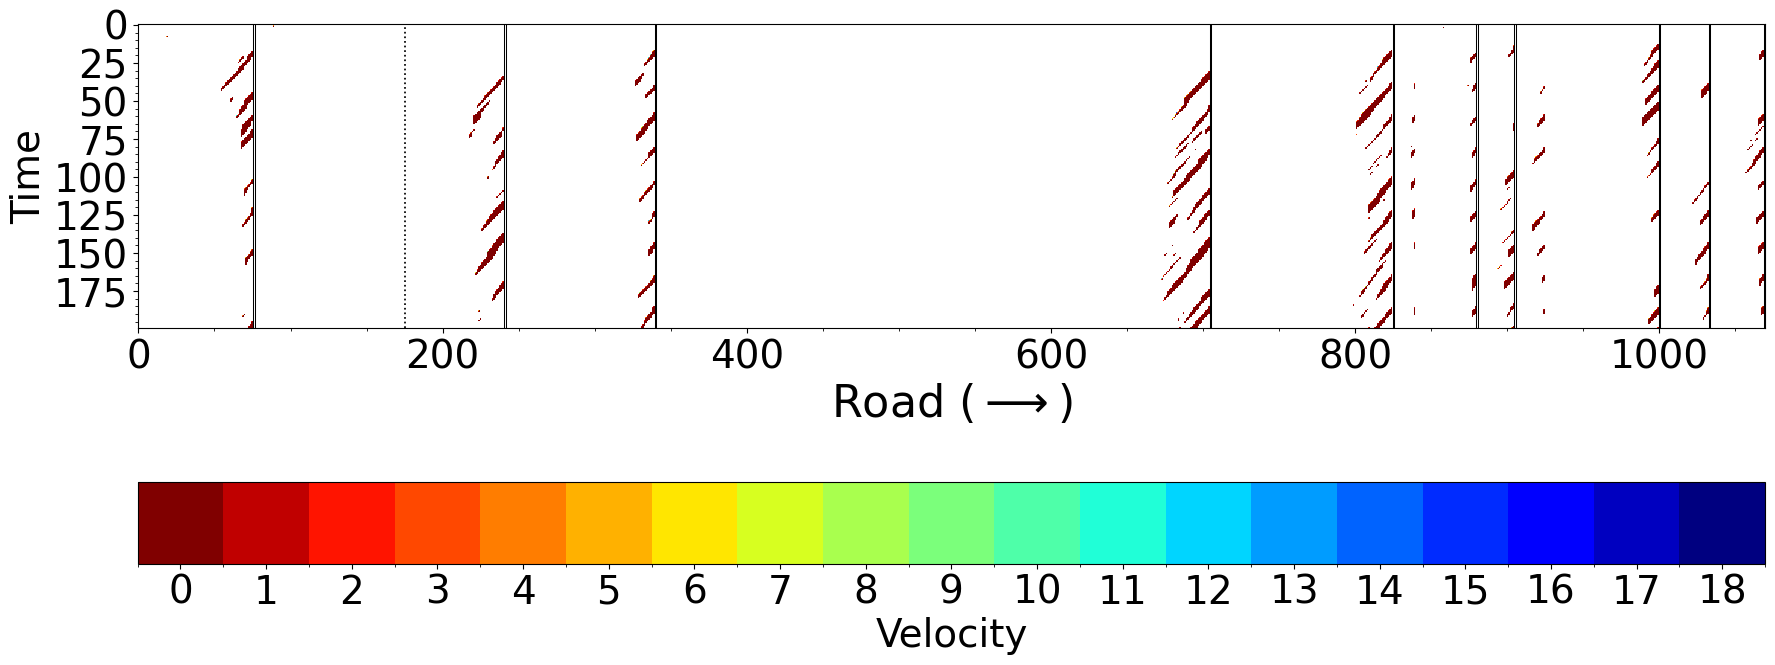

In [17]:
print(f"flow rate = {sim_york_rd[2]}\n", 
      f"average speed range = {sim_york_rd[3]}\n",
      f"average SPI per iteration = {sim_york_rd[4]}")

fig, ax = plt.subplots(figsize = (21,20))
plot_road_with_lights(roads = sim_york_rd[0], traffic_light_roads = sim_york_rd[1], 
                      light_positions = light_positions, limit_boundaries = limit_boundaries, 
                      vmax = max(region_speed_limits), nt = nt, L = sum(region_lengths))